# Lending club Case Study

##### Group Members: 
1. Md Merajul Islam
2. Bishal Sharma

### Assignment Brief:

You work for a consumer finance company **Lending Club** which specialises in lending various types of loans to urban customers. This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. When the company receives a loan application, the company has to **make a decision for loan approval based on the applicant’s profile.**
When a person applies for a loan, there are two types of decisions that could be taken by the company:

**1. Loan accepted:** If the company approves the loan, there are 3 possible scenarios described below:

**Fully paid:** Applicant has fully paid the loan (the principal and the interest rate)

**Current:** Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.

**Charged-off:** Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan 

**2. Loan rejected:** The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)

### Business Objectives:
Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders.

Objective is to i**dentify the risky loan applicants at the time of loan application** so that such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

In other words, **to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.**  The company can utilise this knowledge for its portfolio and risk assessment. And thus minimise the risk of losing money while lending to customers.

## Exploratory Data Analysis

### Data

We have been provided with the **Private Data** of Lending Club.
<br>The complete **loan data** for all loans issued through the time period **2007 to 2011**.

We also have a data dictionary which describes the meaning of these variables.

### Assumption: 
<br>The loan request if graded by LC and then listed for loan. Now it is up to the investor who decides which loan listing to invest in looking at the loan detail and borrowers information.
<br>Only those variables be chosen for analysis that will be available to the investor at the time of deciding whether to invest in a loan request or not.

In [5]:
# importing Required librabries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import time

In [6]:
# Set the default format of float to two decimal points
pd.options.display.float_format='{:.2f}'.format
# Filtering woarnings to avoide displaying unnecessary wornings.
warnings.filterwarnings('ignore')
# Ste pandas option to display all the columns
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [7]:
# reading the data and display few records
df_loan = pd.read_csv("loan.csv",encoding='utf-8',header=0)

In [8]:
# checking the shape of data
df_loan.shape

(39717, 111)

In [9]:
# identifying the field names and data types
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [10]:
# Look at few records from the dataset
df_loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.16,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.67,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.00,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.00,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

The Dataset has records for 39717 loans with 111 associated variables, among which 87 are numeric and 24 are of non numeric type.

Looking at the initial 5 records from the data set we can see that there are a lot of columns having null values.

## Data Cleaning

### Step 1 : Removing Unnecessary Columns

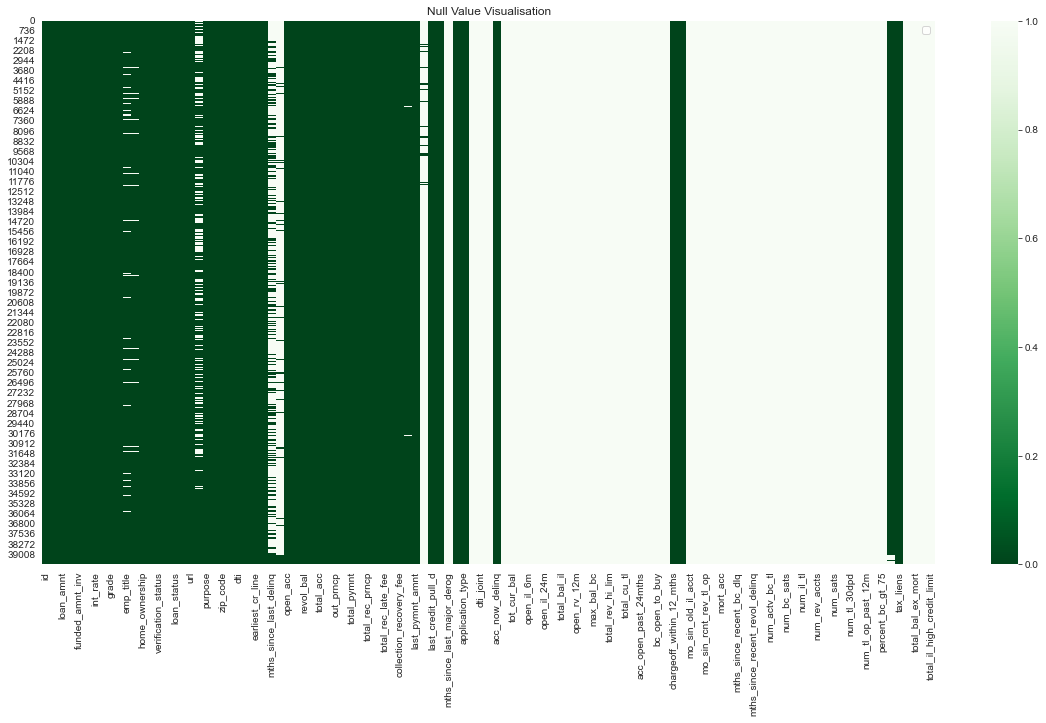

In [11]:
# Visualizing columns for understanding the distribution of null values in the columns
plt.figure('figsize', [20,10])
sns.set_style("whitegrid")
sns.heatmap(df_loan.isnull(), cmap = "Greens_r")
plt.title("Null Value Visualisation")
plt.legend(df_loan.isnull())
plt.show()

We can see that there are columns in the above visulization which are almost empty, lets look at the count of nulls in individual columns

In [12]:
df_null_count = df_loan.isnull().sum()
df_null_count[df_null_count > 0].sort_values(ascending = False)

bc_open_to_buy                39717
acc_open_past_24mths          39717
bc_util                       39717
mo_sin_old_il_acct            39717
mo_sin_old_rev_tl_op          39717
                              ...  
collections_12_mths_ex_med       56
revol_util                       50
tax_liens                        39
title                            11
last_credit_pull_d                2
Length: 68, dtype: int64

As evident from above there are columns which do not have any value so we can delete them, as they will have no impact 
on the analysis.

In [13]:
# remove all the columns where all the values are null and check the individual null count again
df_loan = df_loan.dropna(axis = 1, how = "all")
df_null_count = pd.DataFrame(df_loan.isnull().sum(), columns = ["Count"])
df_null_count["% Null"] = 100 * df_null_count["Count"]/df_loan.shape[0]
df_null_count[df_null_count.Count > 0].sort_values(by = "Count",ascending = False)

,Count,% Null
next_pymnt_d,38577,97.13
mths_since_last_record,36931,92.99
mths_since_last_delinq,25682,64.66
desc,12940,32.58
emp_title,2459,6.19
emp_length,1075,2.71
pub_rec_bankruptcies,697,1.75
last_pymnt_d,71,0.18
collections_12_mths_ex_med,56,0.14
chargeoff_within_12_mths,56,0.14


Columns with high percentage of null value will not provide much insight and will create biasness for the rowes with 
data thus we will drop below columns

<table align="left">
    <tr>
        <th>Column</th>
        <th>Removal reason</th>
    </tr>
    <tr>
        <td>next_pymnt_d</td>
        <td><p>High percentage of null value. 
            <p>Since Next scheduled payment date will not be available while applying for loan it is not relevent for the analysis</td>
    </tr>
    <tr>
        <td>mths_since_last_record</td>
        <td><p>High percentage of null value.</td>
    </tr>
    <tr>
        <td>mths_since_last_delinq</td>
        <td><p>High percentage of null value. 
            <p>Since delinquency related data will not be available while applying for loan it is not relevent for the analysis</td>
    </tr>
    <tr>
        <td>desc</td>
        <td>The description provided by the borrower is unstructured text data and will require advanced method(e.g. NLP) for analysis.</td>
    </tr>
</table>

In [14]:
# Droping the above columns from the data and removing the rows for respective column from null count dataframe
df_loan = df_loan.drop(['next_pymnt_d', 'mths_since_last_record', 'mths_since_last_delinq', 'desc'], axis = 1)
df_null_count = df_null_count.drop(['next_pymnt_d', 'mths_since_last_record', 'mths_since_last_delinq', 'desc'], axis = 0)

In [15]:
df_loan.shape

(39717, 53)

In [16]:
#display rest of the columns with null value for further analysis
df_null_count[df_null_count.Count > 0].sort_values(by = "Count",ascending = False)

,Count,% Null
emp_title,2459,6.19
emp_length,1075,2.71
pub_rec_bankruptcies,697,1.75
last_pymnt_d,71,0.18
collections_12_mths_ex_med,56,0.14
chargeoff_within_12_mths,56,0.14
revol_util,50,0.13
tax_liens,39,0.10
title,11,0.03
last_credit_pull_d,2,0.01


Since Columns with null values are removed for further data cleaning we will look at the columns datatype, count of unique values and business relevence of the varible.

Since catagorical variables having too many uniquevalue will be not relevent for the analysis we will remove them from the data

In [17]:
# add data type and count of unique values of a column from df_loan to df_null_count
df_null_count["Count_unique"] = df_null_count.apply(lambda x:len(df_loan[x.name].unique()),axis = 1) 
df_null_count["Col_Type"] = df_loan.dtypes

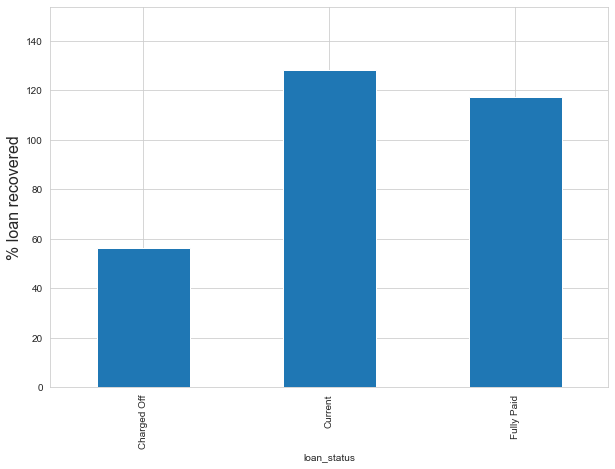

In [18]:
plt.figure(figsize=(10,7))
ax = (df_loan.groupby('loan_status').total_pymnt.sum() * 100 / df_loan.groupby('loan_status').loan_amnt.sum()).plot.bar()
ax.set_ylabel('% loan recovered', fontsize=16)
plt.margins(0.2, 0.2)

In [19]:
df_null_count.sort_values(by = "Count_unique", ascending = False)

,Count,% Null,Count_unique,Col_Type
id,0,0.00,39717,int64
member_id,0,0.00,39717,int64
url,0,0.00,39717,object
total_pymnt,0,0.00,37850,float64
total_pymnt_inv,0,0.00,37518,float64
total_rec_int,0,0.00,35148,float64
last_pymnt_amnt,0,0.00,34930,float64
emp_title,2459,6.19,28821,object
revol_bal,0,0.00,21711,int64
title,11,0.03,19616,object


In [20]:
df_null_count = df_null_count.drop(['id','member_id','url','emp_title','initial_list_status','pymnt_plan','policy_code',
                        'application_type','acc_now_delinq','delinq_amnt','title','collection_recovery_fee','delinq_2yrs',
                        'last_credit_pull_d','last_pymnt_amnt','last_pymnt_d','issue_d',
                        'out_prncp','out_prncp_inv','recoveries','total_pymnt',
                        'total_pymnt_inv','total_rec_int','total_rec_late_fee','total_rec_prncp'], axis = 0)

In [21]:
df_null_count.sort_values(by = "Count_unique", ascending = False)

,Count,% Null,Count_unique,Col_Type
revol_bal,0,0.00,21711,int64
installment,0,0.00,15383,float64
funded_amnt_inv,0,0.00,8205,float64
annual_inc,0,0.00,5318,float64
dti,0,0.00,2868,float64
revol_util,50,0.13,1090,object
funded_amnt,0,0.00,1041,int64
loan_amnt,0,0.00,885,int64
zip_code,0,0.00,823,object
earliest_cr_line,0,0.00,526,object


Fields collections_12_mths_ex_med, chargeoff_within_12_mths, tax_liens has null and there are only 2 unique values, lets find more details.

In [22]:
df_loan.collections_12_mths_ex_med.value_counts()

0.00    39661
Name: collections_12_mths_ex_med, dtype: int64

In [23]:
df_loan.chargeoff_within_12_mths.value_counts()

0.00    39661
Name: chargeoff_within_12_mths, dtype: int64

In [24]:
df_loan.tax_liens.value_counts()

0.00    39678
Name: tax_liens, dtype: int64

Considering the definietion of these variables and the fact that apart from few null values all of them are having zero, we can remove them from the data set.

In [25]:
df_loan = df_loan.drop(['collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'tax_liens'], axis = 1)

In [26]:
df_null_count = df_null_count.drop(['collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'tax_liens'], axis = 0)

In [27]:
df_loan.shape

(39717, 50)

In [28]:
df_loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,policy_code,application_type,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,f,0.00,0.00,5863.16,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,1,INDIVIDUAL,0,0,0.00
1,1077430,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,f,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,1,INDIVIDUAL,0,0,0.00
2,1077175,1313524,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,f,0.00,0.00,3005.67,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,1,INDIVIDUAL,0,0,0.00
3,1076863,1277178,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.00,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,f,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,1,INDIVIDUAL,0,0,0.00
4,1075358,1311748,3000,3000,3000.00,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.00,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,f,524.06,524.06,3513.33,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,1,INDIVIDUAL,0,0,0.00


In [29]:
df_null_count.sort_values(by = "Count", ascending = False)

,Count,% Null,Count_unique,Col_Type
emp_length,1075,2.71,12,object
pub_rec_bankruptcies,697,1.75,4,float64
revol_util,50,0.13,1090,object
purpose,0,0.00,14,object
total_acc,0,0.00,82,int64
revol_bal,0,0.00,21711,int64
pub_rec,0,0.00,5,int64
open_acc,0,0.00,40,int64
inq_last_6mths,0,0.00,9,int64
earliest_cr_line,0,0.00,526,object


### Step 2 - Correcting formats,  data types and imputing data

In [30]:
# Correcting interest rate
df_loan.int_rate.value_counts()

10.99%    956
13.49%    826
11.49%    825
7.51%     787
7.88%     725
         ... 
18.36%      1
16.96%      1
16.15%      1
16.01%      1
17.44%      1
Name: int_rate, Length: 371, dtype: int64

In [31]:
# remove % and change type to Float
df_loan.int_rate = df_loan.int_rate.apply(lambda x:float(x.replace("%", "")))
df_loan.int_rate.dtypes

dtype('float64')

In [32]:
df_loan.term.value_counts()

 36 months    29096
 60 months    10621
Name: term, dtype: int64

Since term is catagorical we can keep it as is

In [33]:
df_loan.earliest_cr_line = pd.to_datetime(df_loan.earliest_cr_line, format='%b-%y', errors='ignore')

In [34]:
df_loan.emp_length.value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

Since it is ordinal data we can keep it as is

In [35]:
df_null_count["Col_Type"] = df_loan.dtypes
df_null_count

,Count,% Null,Count_unique,Col_Type
loan_amnt,0,0.00,885,int64
funded_amnt,0,0.00,1041,int64
funded_amnt_inv,0,0.00,8205,float64
term,0,0.00,2,object
int_rate,0,0.00,371,float64
installment,0,0.00,15383,float64
grade,0,0.00,7,object
sub_grade,0,0.00,35,object
emp_length,1075,2.71,12,object
home_ownership,0,0.00,5,object


Now that we have all the data in the desired format we can explore imputing the missing data in pub_rec_bankruptcies, emp_length and revol_util

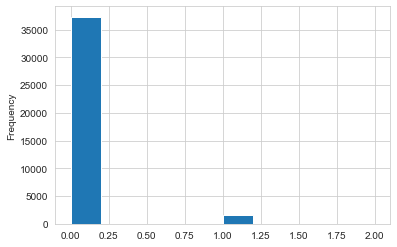

In [36]:
df_loan.pub_rec_bankruptcies.plot.hist()
plt.show()

In [37]:
df_loan.pub_rec_bankruptcies.value_counts()

0.00    37339
1.00     1674
2.00        7
Name: pub_rec_bankruptcies, dtype: int64

In [38]:
df_loan.pub_rec_bankruptcies.isnull().sum()

697

In [51]:
def showLabels(ax, d=None, perc = True):
    plt.margins(0.2, 0.2)
    rects = ax.patches
    #print(rects)
    i = 0
    labels = ax.get_xticklabels()
    #print(ax.get_xticklabels())
    counts = {}
    if not d is None:
        for key, value in d.items():
            counts[str(key)] = value
    

    # For each bar: Place a label
    for rect in rects:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = 5
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'
        #print(str(counts[str(labels[i].get_text())]))

        # Use Y value as label and format number with one decimal place
        if d is None:
            if perc:
                label = "{:.1f}%".format(y_value)
            else:
                label = "{:.1f}".format(y_value)
        else:
            try:
                label = "{:.1f}%".format(y_value) + "\nof " + str(counts[str(labels[i].get_text())])
            except:
                label = "{:.1f}%".format(y_value)
        i = i+1

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.


def plotLoanStatus(dataframe, by, loanstatus='Charged Off', axis = None):
    if axis is None:
        axis = plt.gca()
    grp = dataframe.groupby(['loan_status',by])[by].count()
    cnt = dataframe.groupby(by)[by].count()
    #print(grp)
    percentages = grp.unstack() * 100 / cnt.T
    #print(percentages)
    percentages.loc[loanstatus].plot.bar(color=sns.color_palette('husl', 16), ax = axis)
    axis.set_ylabel('% of loans ' + loanstatus)
    showLabels(axis, grp[loanstatus].to_dict())
    plt.margins(0.2, 0.2)
    plt.tight_layout()
    return ax

Since the field indicates the number of public record bankrupcies which in itself is an exceptional scenario for an individual, and the data also indicates that maximum number of individual has never filed a bankrupcy, We can impute pub_rec_bankruptcies as zero where it is null.

<AxesSubplot:>

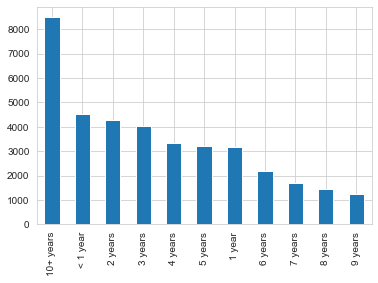

In [52]:
df_loan.emp_length.value_counts().plot.bar()

Looking at the distribution of employment length alone we will not be able to impute the values thus we will continue the analysis further for getting a better understanding.

In [53]:
df_loan.revol_util.value_counts()

0.00     954
0.20      62
63.00     62
40.70     57
31.20     57
        ... 
77.63      1
25.74      1
0.83       1
47.36      1
7.28       1
Name: revol_util, Length: 1088, dtype: int64

In [54]:
# remove % and change type to Float
df_loan.revol_util = df_loan.revol_util.apply(lambda x: float(x.replace("%", "")) if type(x) == str else x)
df_loan.revol_util.dtypes

dtype('float64')

revol_util : Utilized credit balance indicates how much percentag of available credit a person has utilized. For the 50 missing records we can impute it to zero which is also supported by the data.

### Step 3 - Cleaning Rows

Lets have a look at the target variable to understand the distribution and the nature of data

In [55]:
df_loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,policy_code,application_type,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.00,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer,860xx,AZ,27.65,0,1985-01-01,1,3,0,13648,83.70,9,f,0.00,0.00,5863.16,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,1,INDIVIDUAL,0,0,0.00
1,1077430,1314167,2500,2500,2500.00,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00,0,1999-04-01,5,3,0,1687,9.40,4,f,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,1,INDIVIDUAL,0,0,0.00
2,1077175,1313524,2400,2400,2400.00,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,real estate business,606xx,IL,8.72,0,2001-11-01,2,2,0,2956,98.50,10,f,0.00,0.00,3005.67,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,1,INDIVIDUAL,0,0,0.00
3,1076863,1277178,10000,10000,10000.00,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.00,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917xx,CA,20.00,0,1996-02-01,1,10,0,5598,21.00,37,f,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,1,INDIVIDUAL,0,0,0.00
5,1075269,1311441,5000,5000,5000.00,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.00,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0,2004-11-01,3,9,0,7963,28.30,12,f,0.00,0.00,5632.21,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,1,INDIVIDUAL,0,0,0.00


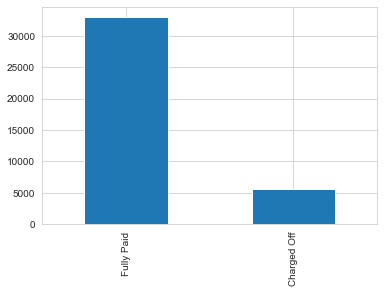

In [56]:
df_loan.loan_status.value_counts().plot.bar()
plt.show()

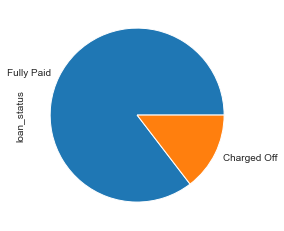

In [57]:
df_loan.loan_status.value_counts().plot.pie()
plt.show()

Observations:
1. Most of the Loans are Fully Paid
2. A vary small portion of the data is for current loan, which is irrelevant for the current analysis so we can remove them
3. The ratio of Charged Off data and Fully Paid data is huge which can cause bias in the analysis.

In [45]:
df_loan = df_loan[df_loan["loan_status"] != "Current"]
df_loan.shape

(38577, 50)

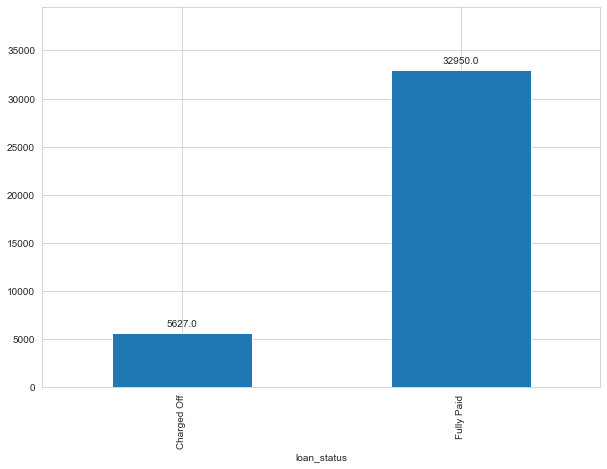

In [58]:
plt.figure(figsize=(10,7))
ax = df_loan.groupby('loan_status').loan_amnt.count().plot.bar()
showLabels(ax,perc = False)
plt.show()

In [59]:
df_loan.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

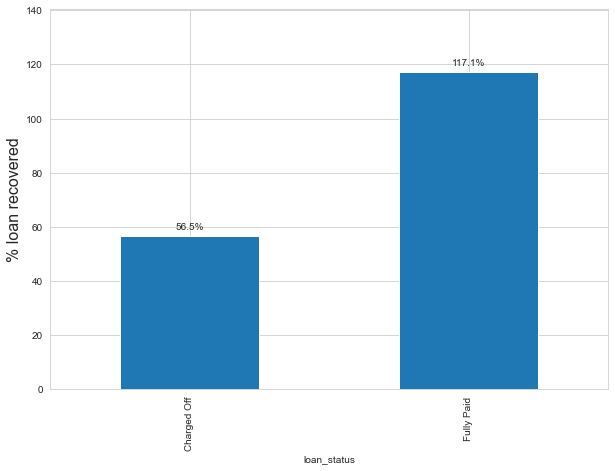

In [60]:
plt.figure(figsize=(10,7))
ax = (df_loan.groupby('loan_status').total_pymnt.sum() * 100 / df_loan.groupby('loan_status').loan_amnt.sum()).plot.bar()
ax.set_ylabel('% loan recovered', fontsize=16)
plt.margins(0.2, 0.2)
showLabels(ax)
#plt.xticks() 

# Univariate and Segmented Univariate Analysis

In [61]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 50 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       38577 non-null  int64         
 1   member_id                38577 non-null  int64         
 2   loan_amnt                38577 non-null  int64         
 3   funded_amnt              38577 non-null  int64         
 4   funded_amnt_inv          38577 non-null  float64       
 5   term                     38577 non-null  object        
 6   int_rate                 38577 non-null  float64       
 7   installment              38577 non-null  float64       
 8   grade                    38577 non-null  object        
 9   sub_grade                38577 non-null  object        
 10  emp_title                36191 non-null  object        
 11  emp_length               37544 non-null  object        
 12  home_ownership           38577 n

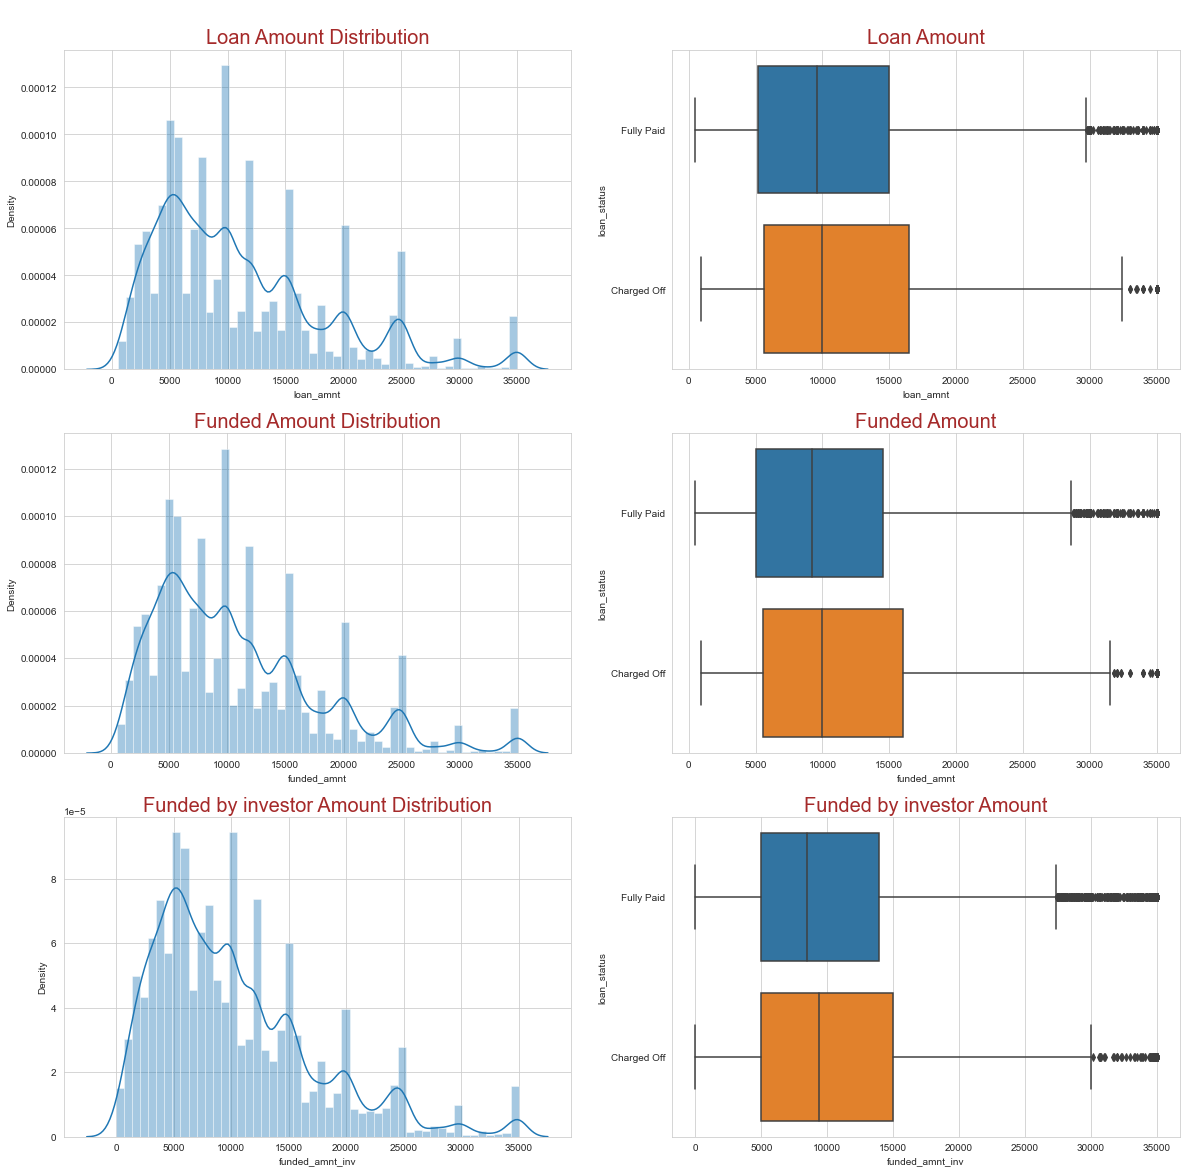

In [62]:
fig, ax = plt.subplots(ncols = 2, nrows = 3, figsize=[20,20])

sns.distplot(df_loan.loan_amnt, ax = ax[0, 0])
ax[0, 0].set_title('\nLoan Amount Distribution', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})

sns.boxplot(df_loan.loan_amnt,df_loan.loan_status, ax = ax[0, 1])
ax[0, 1].set_title('\nLoan Amount', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})

sns.distplot(df_loan.funded_amnt, ax = ax[1, 0])
ax[1, 0].set_title('\nFunded Amount Distribution', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})

sns.boxplot(df_loan.funded_amnt,df_loan.loan_status, ax = ax[1, 1])
ax[1, 1].set_title('\nFunded Amount', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})

sns.distplot(df_loan.funded_amnt_inv, ax = ax[2, 0])
ax[2, 0].set_title('\nFunded by investor Amount Distribution', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})

sns.boxplot(df_loan.funded_amnt_inv,df_loan.loan_status, ax = ax[2, 1])
ax[2, 1].set_title('\nFunded by investor Amount', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})

plt.show()

In [63]:
df_loan.groupby('loan_status')['loan_amnt', 'funded_amnt', 'funded_amnt_inv'].describe()

loan_amnt                                                    \
                count     mean     std    min     25%      50%      75%   
loan_status                                                               
Charged Off   5627.00 12104.39 8085.73 900.00 5600.00 10000.00 16500.00   
Fully Paid   32950.00 10866.46 7199.63 500.00 5200.00  9600.00 15000.00   

                     funded_amnt                                           \
                 max       count     mean     std    min     25%      50%   
loan_status                                                                 
Charged Off 35000.00     5627.00 11753.40 7760.52 900.00 5575.00 10000.00   
Fully Paid  35000.00    32950.00 10618.52 6956.05 500.00 5050.00  9200.00   

                              funded_amnt_inv                                \
                 75%      max           count     mean     std  min     25%   
loan_status                                                                   
Charged Off 16000.00 35000.00         5627.00 10864.52 7661.75 0.00 5000.00   
Fully Paid  14500.00 35000.00        32950.00 10112.84 6901.84 0.00 5000.00   

                                       
                50%      75%      max  
loan_status                            
Charged Off 9401.21 15000.00 35000.00  
Fully Paid  8500.00 13950.00 35000.00

### Insight

**Understanding:**

* **Most of the loan amounts are in the range of 0-15K dollars**
* **data is little left skewed**

**Observation:**

* Overall, the applied loan amount distribution is slightly **right-skewed** with mean greater than the median. Most of the loans granted are below 15000 (75 percentile value)
* Funding amounts see a spike around each 5000 boundary. <mark>We will use 5000 as bucket size for later analysis.</mark>

In [64]:
df_loan['loan_amnt_bin'] = df_loan.loan_amnt.apply(lambda x: "{:02d}-{:02d}K".format((x//5000)*5, (x//5000 + 1)*5))
df_loan['funded_amnt_bin'] = df_loan.funded_amnt.apply(lambda x: "{:02d}-{:02d}K".format((x//5000)*5, (x//5000 + 1)*5))
df_loan['funded_amnt_inv_bin'] = df_loan.funded_amnt_inv.apply(lambda x: "{:02d}-{:02d}K".format(int(x//5000)*5, int(x//5000 + 1)*5))

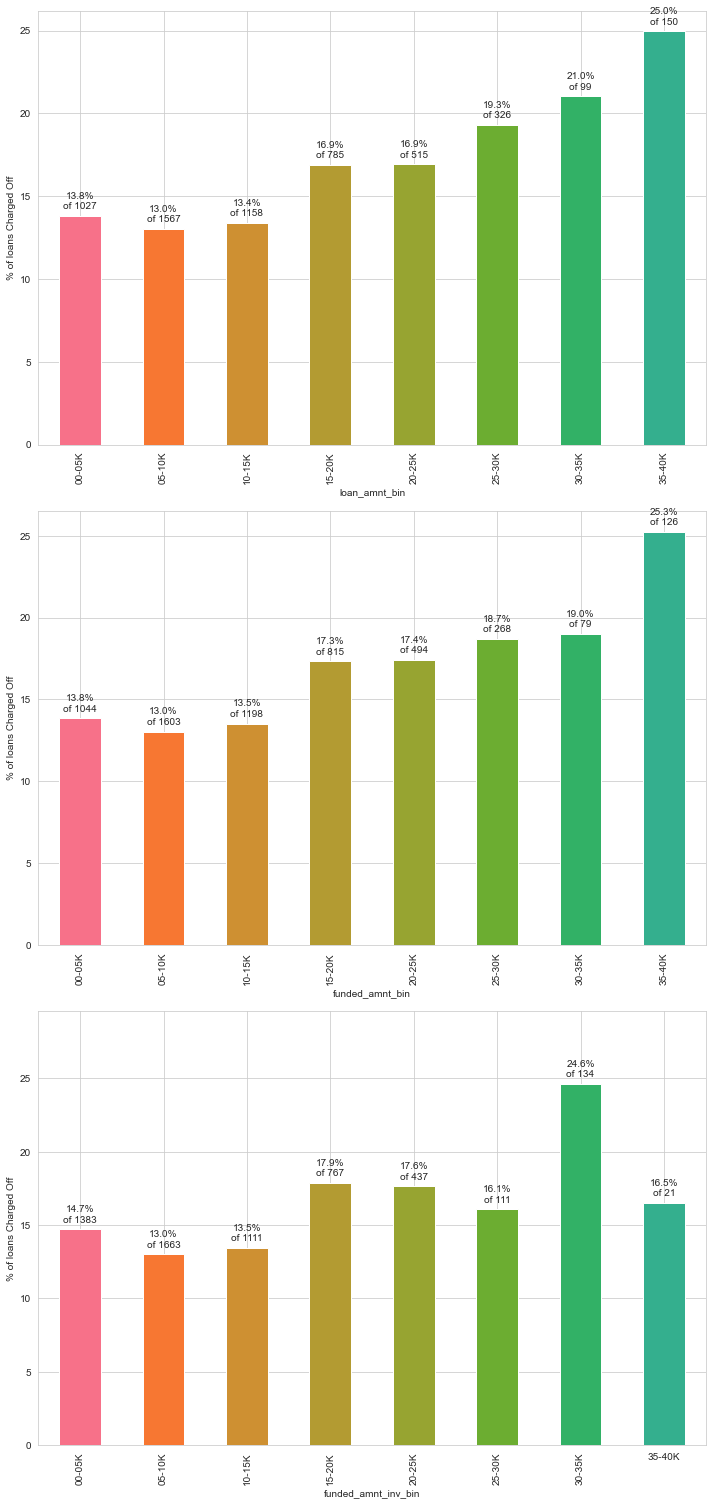

In [65]:
fig, ax = plt.subplots( nrows = 3, figsize=[10,21])

plotLoanStatus(df_loan, 'loan_amnt_bin', axis = ax[0])
plotLoanStatus(df_loan, 'funded_amnt_bin', axis = ax[1])
plotLoanStatus(df_loan, 'funded_amnt_inv_bin', axis = ax[2])
plt.show()

**Observation:**
- The % of charged off loans increases substancially as we go up the loan amount buckets. Most loans are below 20000 amount. The higher loans, though lesser in number, carry a substantially higher risk of default. 

In [66]:
df_loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,policy_code,application_type,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies,loan_amnt_bin,funded_amnt_bin,funded_amnt_inv_bin
0,1077501,1296599,5000,5000,4975.00,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer,860xx,AZ,27.65,0,1985-01-01,1,3,0,13648,83.70,9,f,0.00,0.00,5863.16,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,1,INDIVIDUAL,0,0,0.00,05-10K,05-10K,00-05K
1,1077430,1314167,2500,2500,2500.00,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00,0,1999-04-01,5,3,0,1687,9.40,4,f,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,1,INDIVIDUAL,0,0,0.00,00-05K,00-05K,00-05K
2,1077175,1313524,2400,2400,2400.00,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,real estate business,606xx,IL,8.72,0,2001-11-01,2,2,0,2956,98.50,10,f,0.00,0.00,3005.67,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,1,INDIVIDUAL,0,0,0.00,00-05K,00-05K,00-05K
3,1076863,1277178,10000,10000,10000.00,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.00,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917xx,CA,20.00,0,1996-02-01,1,10,0,5598,21.00,37,f,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,1,INDIVIDUAL,0,0,0.00,10-15K,10-15K,10-15K
5,1075269,1311441,5000,5000,5000.00,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.00,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0,2004-11-01,3,9,0,7963,28.30,12,f,0.00,0.00,5632.21,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,1,INDIVIDUAL,0,0,0.00,05-10K,05-10K,05-10K


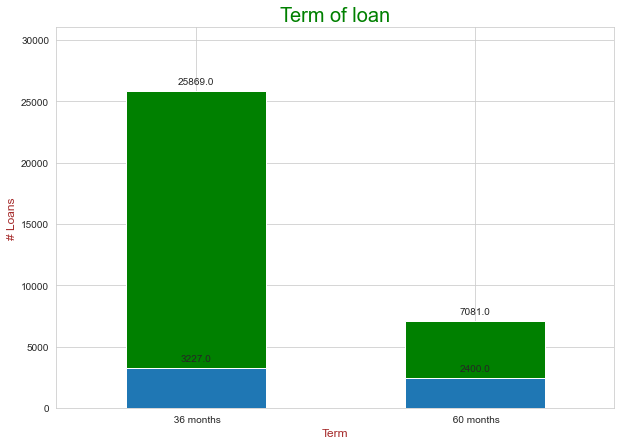

In [67]:
plt.figure(figsize = [10, 7])
ax = df_loan[df_loan.loan_status == "Fully Paid"].term.value_counts().plot.bar(color = "green")
df_loan[df_loan.loan_status == "Charged Off"].term.value_counts().plot.bar()
ax.set_title("Term of loan", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
ax.set_ylabel("# Loans", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
ax.set_xlabel("Term", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
ax.tick_params(labelrotation=0)
showLabels(ax, perc = False)
plt.show()

**Observation**

1. For 36 months loan the Charged off percent is less as compared to 60 months loan
2. Longer tenure loans are associated with higher risk

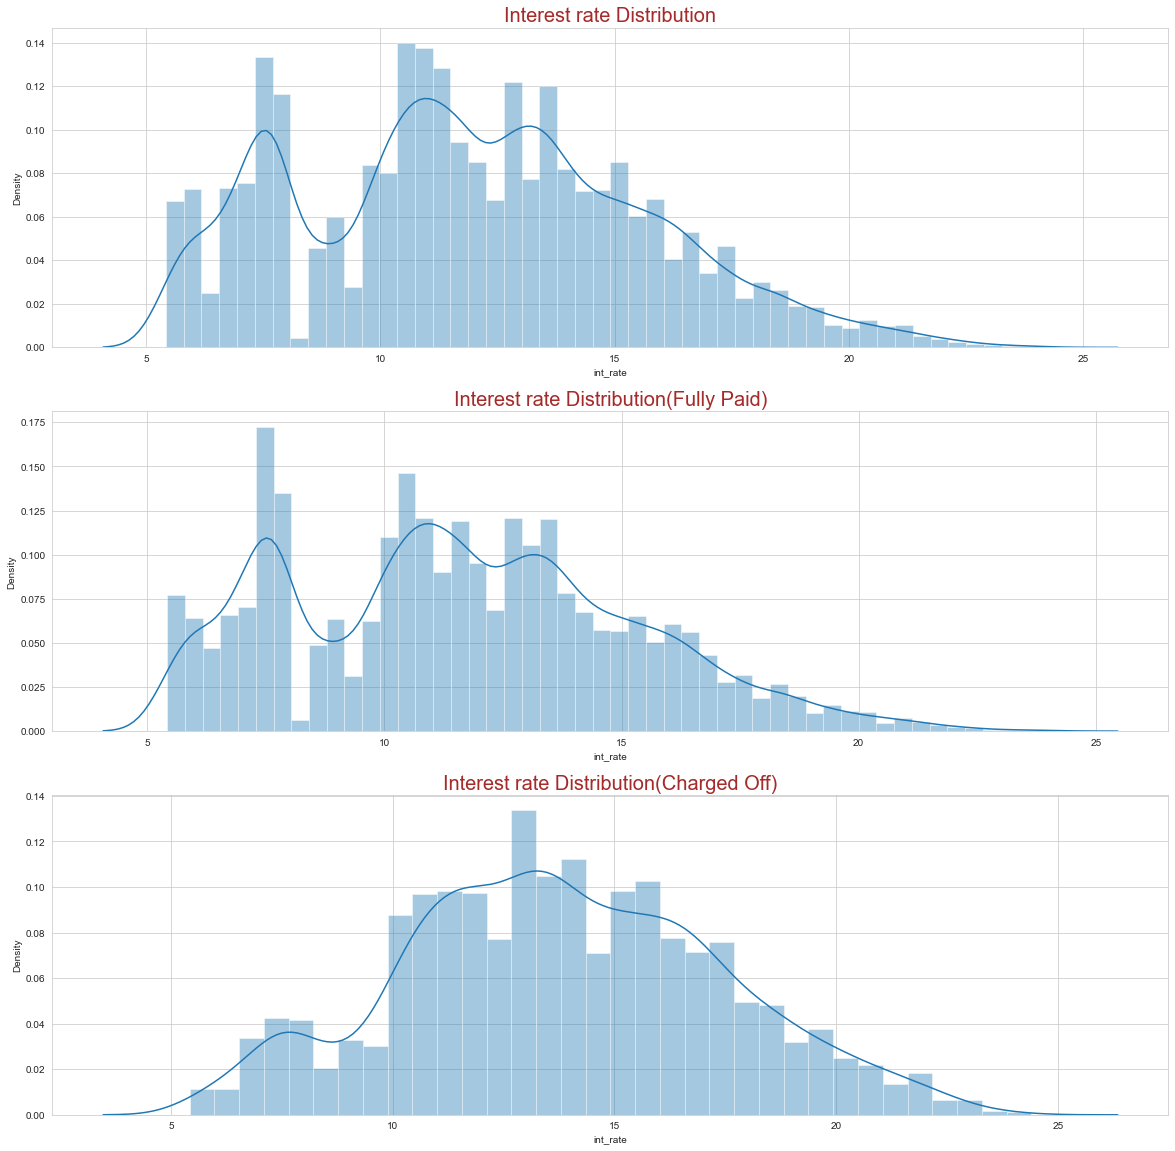

In [68]:
fig, ax = plt.subplots(nrows = 3, figsize=[20,20])

sns.distplot(df_loan.int_rate, ax = ax[0])
ax[0].set_title("Interest rate Distribution", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})

sns.distplot(df_loan[df_loan.loan_status == "Fully Paid"].int_rate, ax = ax[1])
ax[1].set_title("Interest rate Distribution(Fully Paid)", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})

sns.distplot(df_loan[df_loan.loan_status == "Charged Off"].int_rate, ax = ax[2])
ax[2].set_title("Interest rate Distribution(Charged Off)", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})

plt.show()

**Observation**

1. The Interest rate distribution across the data and Fully paid data is similar.
    * This can be due to the fact that the ratio of fully paid data is more.
2. The Distribution of Fully paid intrest rate is skewed towards left, Indicating the chances of default is low when the interest rate is low.
3. The Distribution of interest rate for charged off loans are relatevely normaly distributed.

We will convert the rates in diferent bins and compare the ratio for them

In [69]:
df_loan["int_rate_rng"] = df_loan.int_rate.apply(lambda x: "{:2d} to {:2d}".format(int(x//5)*5,int(x//5 + 1)*5 ))

In [70]:
df_int_cnt = pd.pivot_table(data = df_loan, values= "addr_state", index= "loan_status", columns = "int_rate_rng", aggfunc = 'count')
df_int_cnt

int_rate_rng,5 to 10,10 to 15,15 to 20,20 to 25
loan_status,,,,
Charged Off,799,2738,1794,296
Fully Paid,11268,15776,5432,474


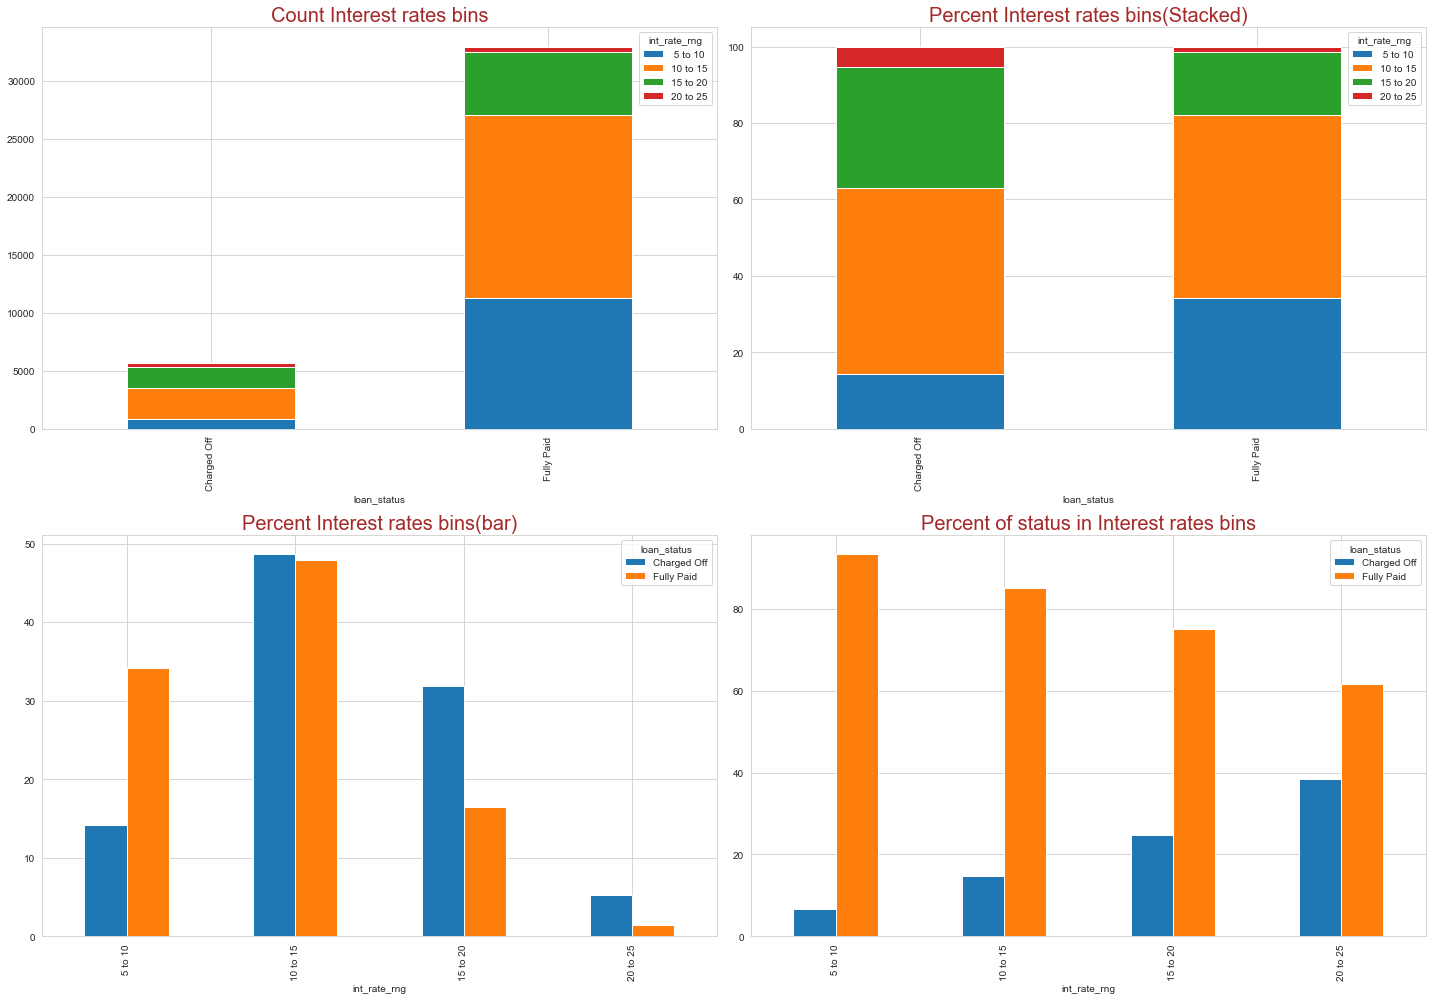

In [71]:
fig, ax = plt.subplots(2, 2, figsize= [20, 14])
df_int_cnt.plot(kind= "bar", stacked = True, ax = ax[0,0])
ax[0,0].set_title("Count Interest rates bins", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})
df_int_cnt.apply(lambda x: 100 * x/x.sum(), axis = 1).plot(kind= "bar", stacked = True, ax = ax[0,1])
ax[0,1].set_title("Percent Interest rates bins(Stacked)", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})
df_int_cnt.apply(lambda x: 100 * x/x.sum(), axis = 1).T.plot(kind= "bar", stacked = False, ax = ax[1,0])
ax[1,0].set_title("Percent Interest rates bins(bar)", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})
df_int_cnt.apply(lambda x: 100 * x/x.sum(), axis = 0).T.plot(kind= "bar", stacked = False, ax = ax[1,1])
ax[1,1].set_title("Percent of status in Interest rates bins", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})
fig.tight_layout()
plt.show()

**Observation**

From the above we can see that higher interest rates contribute more to Chargeoff, increasing the risk.

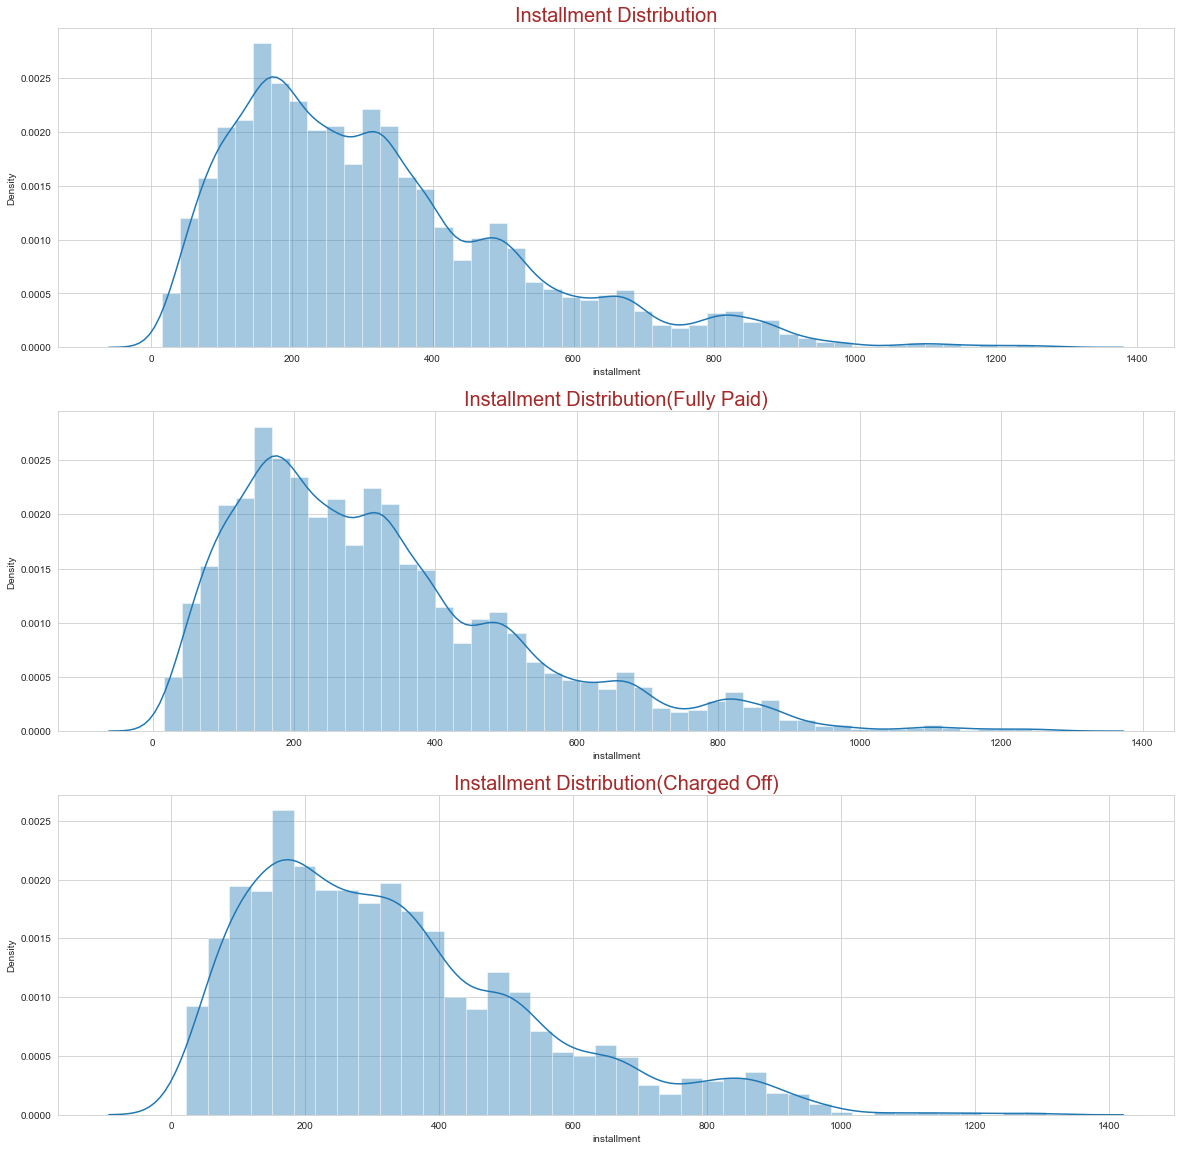

In [72]:
fig, ax = plt.subplots(nrows = 3, figsize=[20,20])
sns.distplot(df_loan.installment, ax = ax[0])
ax[0].set_title("Installment Distribution", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})
sns.distplot(df_loan[df_loan.loan_status == "Fully Paid"].installment, ax = ax[1])
ax[1].set_title("Installment Distribution(Fully Paid)", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})
sns.distplot(df_loan[df_loan.loan_status == "Charged Off"].installment, ax = ax[2])
ax[2].set_title("Installment Distribution(Charged Off)", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})
plt.show()

**Observation**

Installments follow very similar distribution for chargeoff and fully paid, it does not seem like it is a driver for defaults.

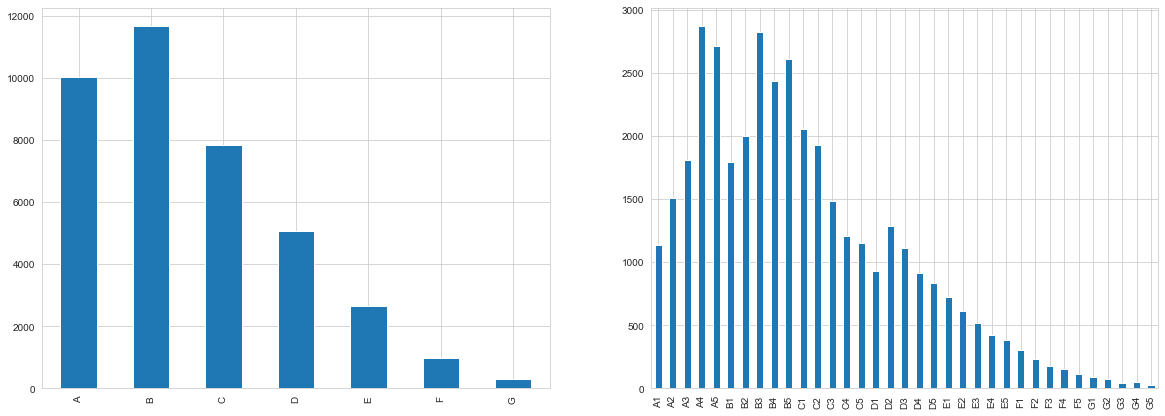

In [73]:
fig, ax = plt.subplots(ncols = 2, figsize = [20, 7])
df_loan.grade.value_counts().sort_index().plot.bar(ax = ax[0])
df_loan.sub_grade .value_counts().sort_index().plot.bar(ax = ax[1])
plt.show()

In [74]:
df_pivot = pd.pivot_table(data = df_loan, values= "addr_state", index= "loan_status", columns = "grade", aggfunc = 'count')
df_pivot_sub = pd.pivot_table(data = df_loan, values= "addr_state", index= "loan_status", columns = ["grade","sub_grade"], aggfunc = 'count')
df_pivot

grade,A,B,C,D,E,F,G
loan_status,,,,,,,
Charged Off,602,1425,1347,1118,715,319,101
Fully Paid,9443,10250,6487,3967,1948,657,198


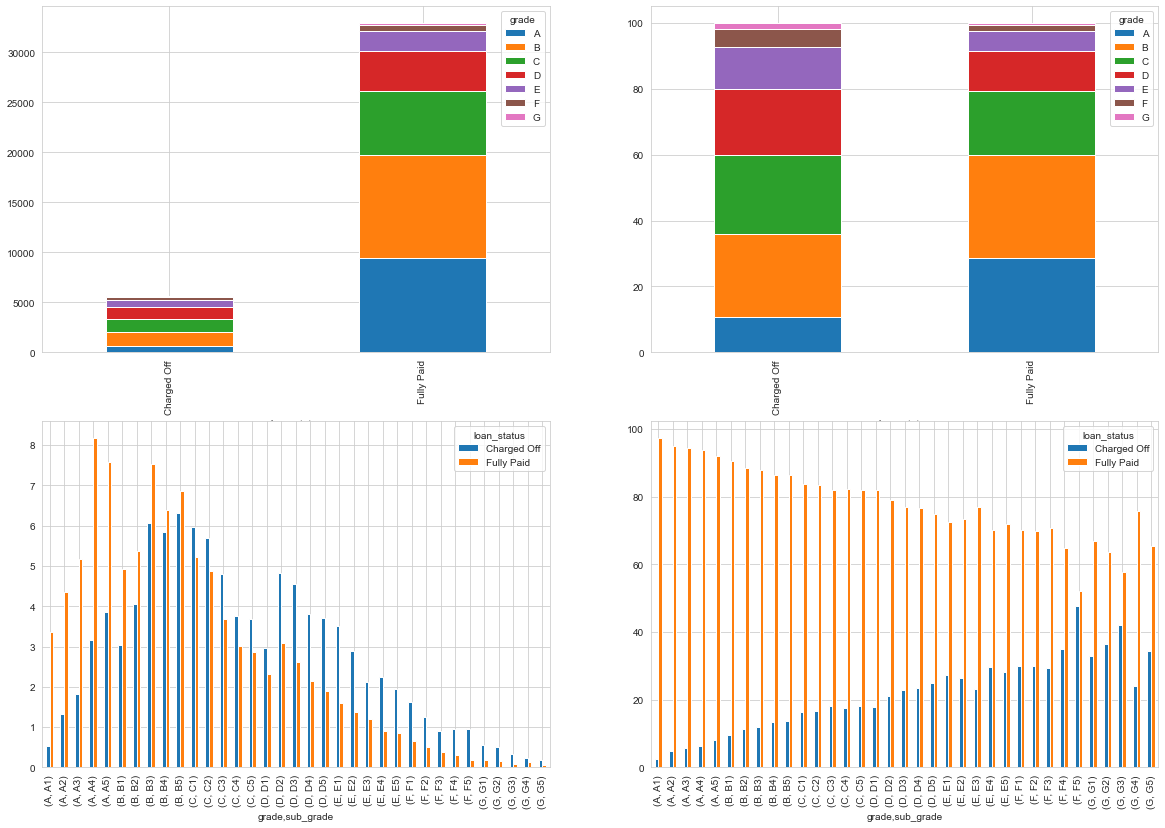

In [75]:
fig, ax = plt.subplots(2, 2, figsize = [20, 14])
df_pivot.plot(kind= "bar", stacked = True, ax = ax[0, 0])
df_pivot.apply(lambda x: 100 * x/x.sum(), axis = 1).plot(kind= "bar", stacked = True, ax = ax[0, 1])
df_pivot_sub.apply(lambda x: 100 * x/x.sum(), axis = 1).T.plot(kind= "bar", stacked = False, ax = ax[1, 0])
df_pivot_sub.apply(lambda x: 100 * x/x.sum(), axis = 0).T.plot(kind= "bar", stacked = False, ax = ax[1, 1])
plt.show()

**Observation**

* The Higher Grade loans are approved more often as compared to lower grade loans (A being higher and G lower)
* The loans with lower grade has a higher probability of defaults.

In [76]:
df_loan.annual_inc.describe()

count     38577.00
mean      68777.97
std       64218.68
min        4000.00
25%       40000.00
50%       58868.00
75%       82000.00
max     6000000.00
Name: annual_inc, dtype: float64

Text(0.5, 1.0, 'Distribution of income(Charged Off)')

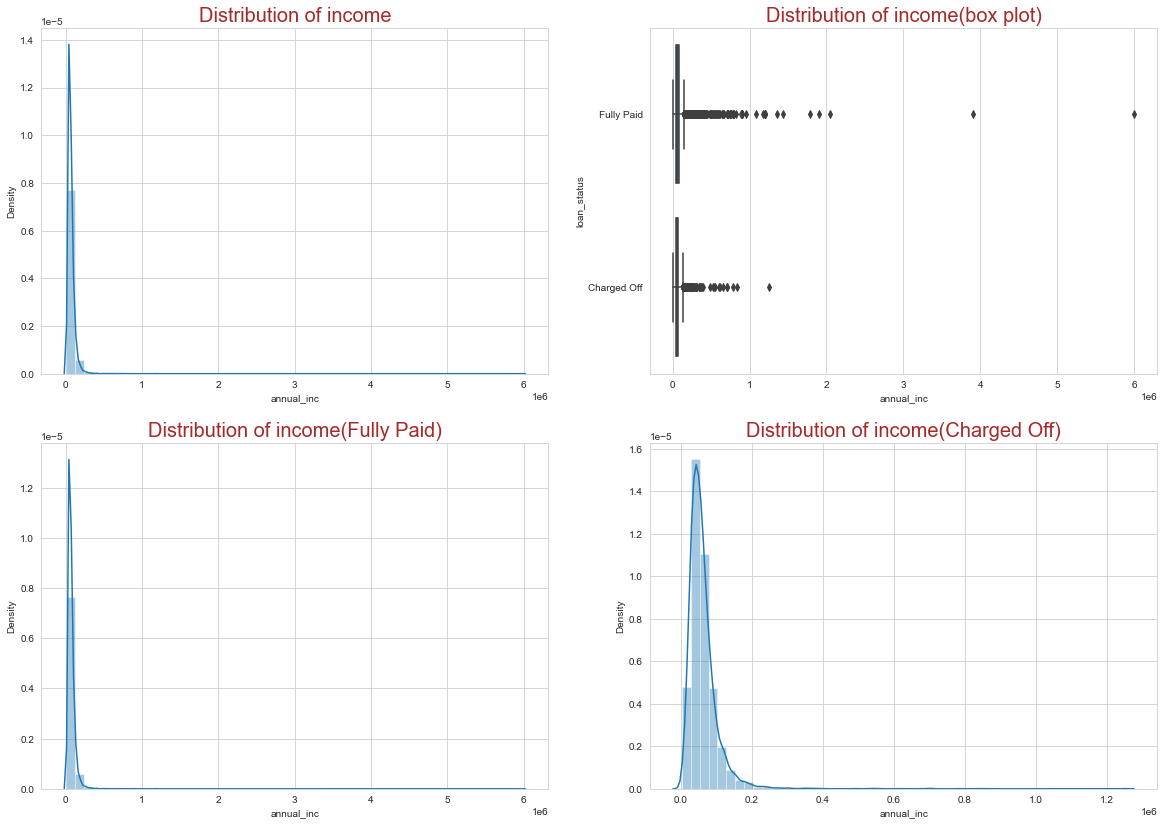

In [77]:
fig,ax = plt.subplots(ncols = 2,nrows = 2, figsize = [20, 14])
sns.distplot(df_loan.annual_inc, ax = ax[0, 0])
ax[0, 0].set_title("Distribution of income", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})

sns.boxplot(df_loan.annual_inc, df_loan.loan_status, ax = ax[0, 1])
ax[0, 1].set_title("Distribution of income(box plot)", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})

sns.distplot(df_loan[df_loan.loan_status == "Fully Paid"].annual_inc, ax = ax[1, 0])
ax[1, 0].set_title("Distribution of income(Fully Paid)", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})

sns.distplot(df_loan[df_loan.loan_status == "Charged Off"].annual_inc, ax = ax[1, 1])
ax[1, 1].set_title("Distribution of income(Charged Off)", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})

**Observation**

* Anual income is extreamly skewed towards left.

In [78]:
# converting income level in 3 buckets, low(0) <= 50000, medium(1) >50000 and < 100000, high(2) >100000
df_loan["income_level"] = df_loan.annual_inc.apply(lambda x: 0 if x <= 50000 else 1 if (x > 50000)&(x <= 100000) else 2 )

In [79]:
df_loan["income_level"].value_counts()

1    17707
0    15389
2     5481
Name: income_level, dtype: int64

In [80]:
df_pivot = pd.pivot_table(data = df_loan, values= "addr_state", index= "loan_status", columns = "income_level", aggfunc = 'count')
df_pivot

income_level,0,1,2
loan_status,,,
Charged Off,2613,2422,592
Fully Paid,12776,15285,4889


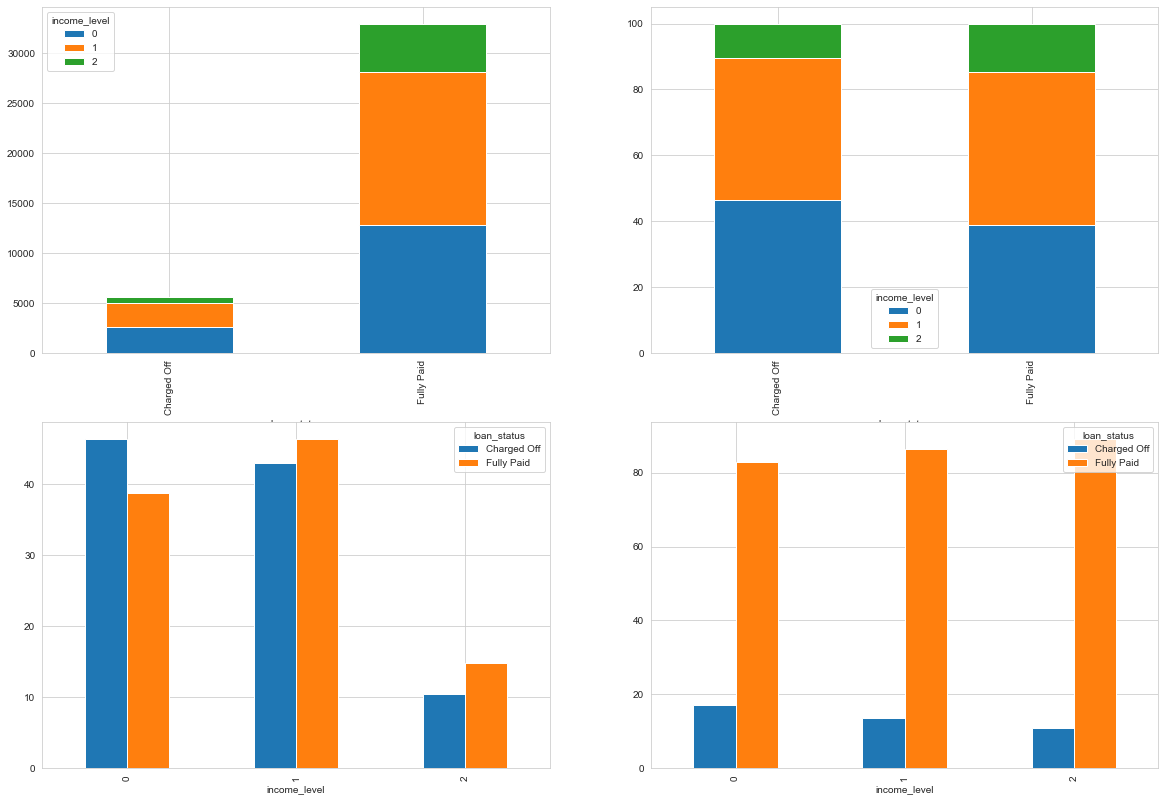

In [81]:
fix, ax = plt.subplots(ncols = 2, nrows = 2, figsize = [20,14])
df_pivot.plot.bar(stacked = True, ax = ax[0, 0])
df_pivot.apply(lambda x: 100 * x/x.sum(), axis = 1).plot.bar(stacked = True, ax = ax[0, 1])
df_pivot.apply(lambda x: 100 * x/x.sum(), axis = 1).T.plot.bar(ax = ax[1, 0])
df_pivot.apply(lambda x: 100 * x/x.sum(), axis = 0).T.plot.bar(ax = ax[1, 1])
plt.show()

<AxesSubplot:>

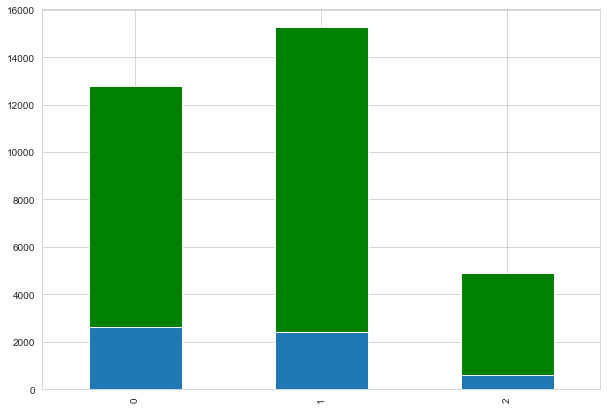

In [82]:
fig, ax = plt.subplots(ncols = 1, figsize=[10,7])
#df_loan["income_level"].value_counts().sort_index().plot.bar(ax = ax[0])
df_loan[df_loan.loan_status == "Fully Paid"].income_level.value_counts().sort_index().plot.bar(ax = ax, color = "Green")
df_loan[df_loan.loan_status == "Charged Off"].income_level.value_counts().sort_index().plot.bar(ax = ax)

**Observation**

Higher income indiviluals have less charge off but it can be due to the fact that the number of loans is also less.

The ratio in all income level is similar, thus we can not consider it as an variable having high impact on its own. in associattion with loan amount it may give us a better insight.

In [83]:
df_loan.dti.describe()

count   38577.00
mean       13.27
std         6.67
min         0.00
25%         8.13
50%        13.37
75%        18.56
max        29.99
Name: dti, dtype: float64

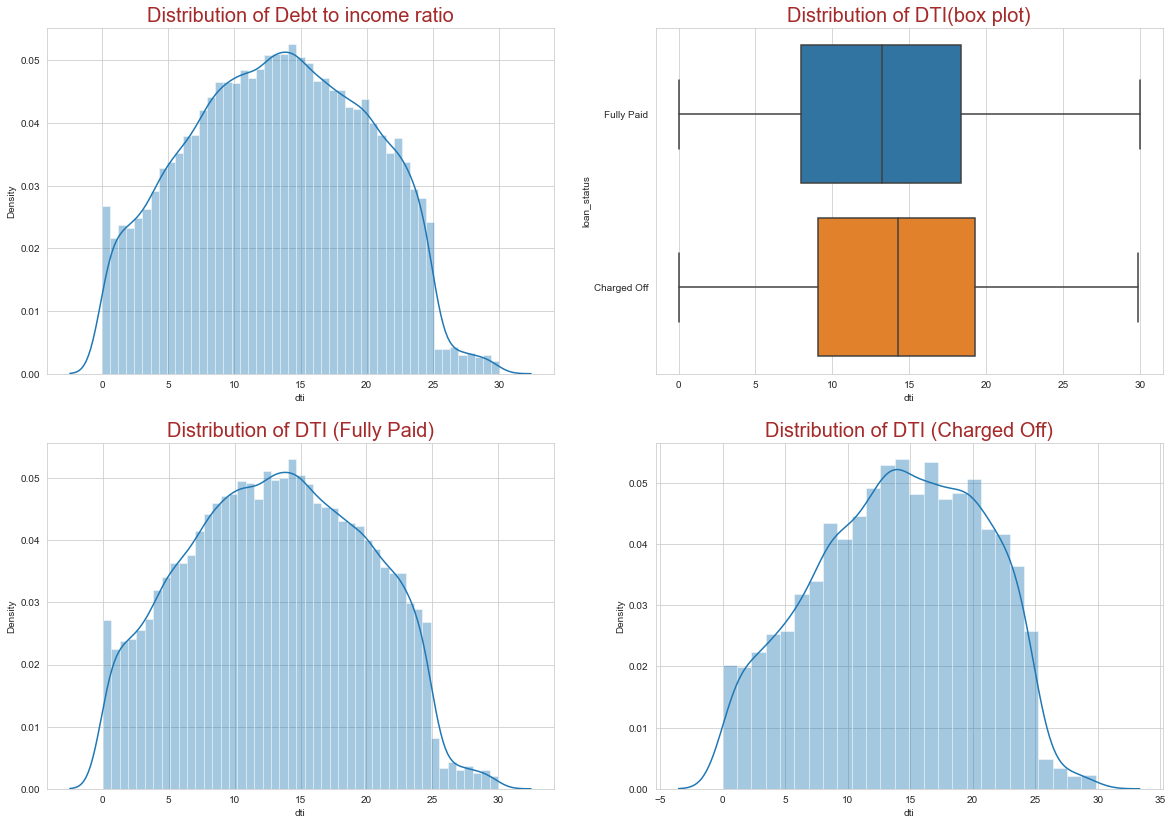

In [84]:
fig,ax = plt.subplots(ncols = 2,nrows = 2, figsize = [20, 14])
sns.distplot(df_loan.dti, ax = ax[0, 0])
ax[0, 0].set_title("Distribution of Debt to income ratio", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})

sns.boxplot(df_loan.dti, df_loan.loan_status, ax = ax[0, 1])
ax[0, 1].set_title("Distribution of DTI(box plot)", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})

sns.distplot(df_loan[df_loan.loan_status == "Fully Paid"].dti, ax = ax[1, 0])
ax[1, 0].set_title("Distribution of DTI (Fully Paid)", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})

sns.distplot(df_loan[df_loan.loan_status == "Charged Off"].dti, ax = ax[1, 1])
ax[1, 1].set_title("Distribution of DTI (Charged Off)", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})

plt.show()

In [85]:
df_loan["dti_bins"] = df_loan.dti.apply(lambda x: "{:02d}-{:02d}".format(int(x//5)*5, int(x//5 +1)*5))

In [86]:
df_pivot = pd.pivot_table(data = df_loan, values= "addr_state", index= "loan_status", columns = "dti_bins", aggfunc = 'count')
df_pivot

dti_bins,00-05,05-10,10-15,15-20,20-25,25-30
loan_status,,,,,,
Charged Off,625,1001,1399,1394,1121,87
Fully Paid,4419,6860,8225,7430,5478,538


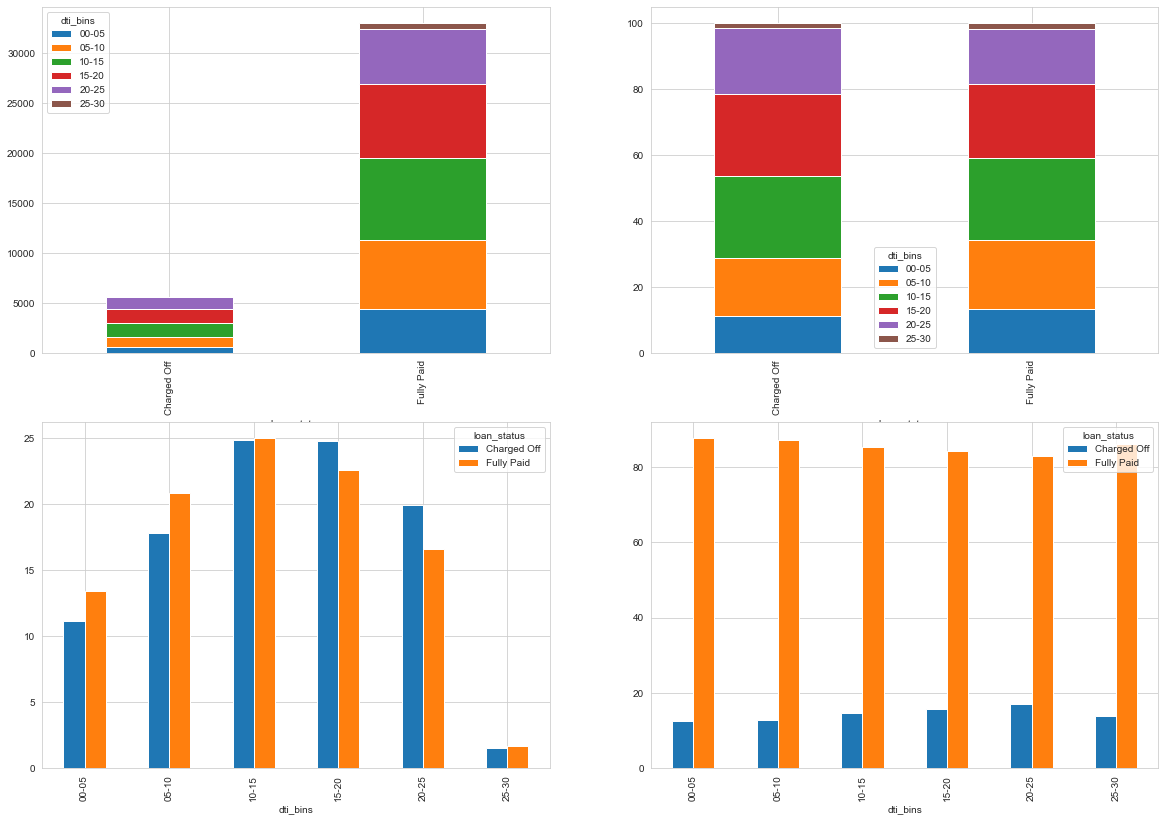

In [87]:
df_pivot = pd.pivot_table(data = df_loan, values= "addr_state", index= "loan_status", columns = "dti_bins", aggfunc = 'count')
fix, ax = plt.subplots(ncols = 2, nrows = 2, figsize = [20,14])
df_pivot.plot.bar(stacked = True, ax = ax[0, 0])
df_pivot.apply(lambda x: 100 * x/x.sum(), axis = 1).plot.bar(stacked = True, ax = ax[0, 1])
df_pivot.apply(lambda x: 100 * x/x.sum(), axis = 1).T.plot.bar(ax = ax[1, 0])
df_pivot.apply(lambda x: 100 * x/x.sum(), axis = 0).T.plot.bar(ax = ax[1, 1])
plt.show()

**Observation**

* DTI for defaulters is squed torwards right, i.e. for higher DTI the probability of Charge Off is high.
* The percentage of defaulters in each bin of DTI is in the range of 10-18, and from the distribution of data we can see that Lending Club is causious about disburshing loan to high DTI individuals

### Visualizing other Categorical variables

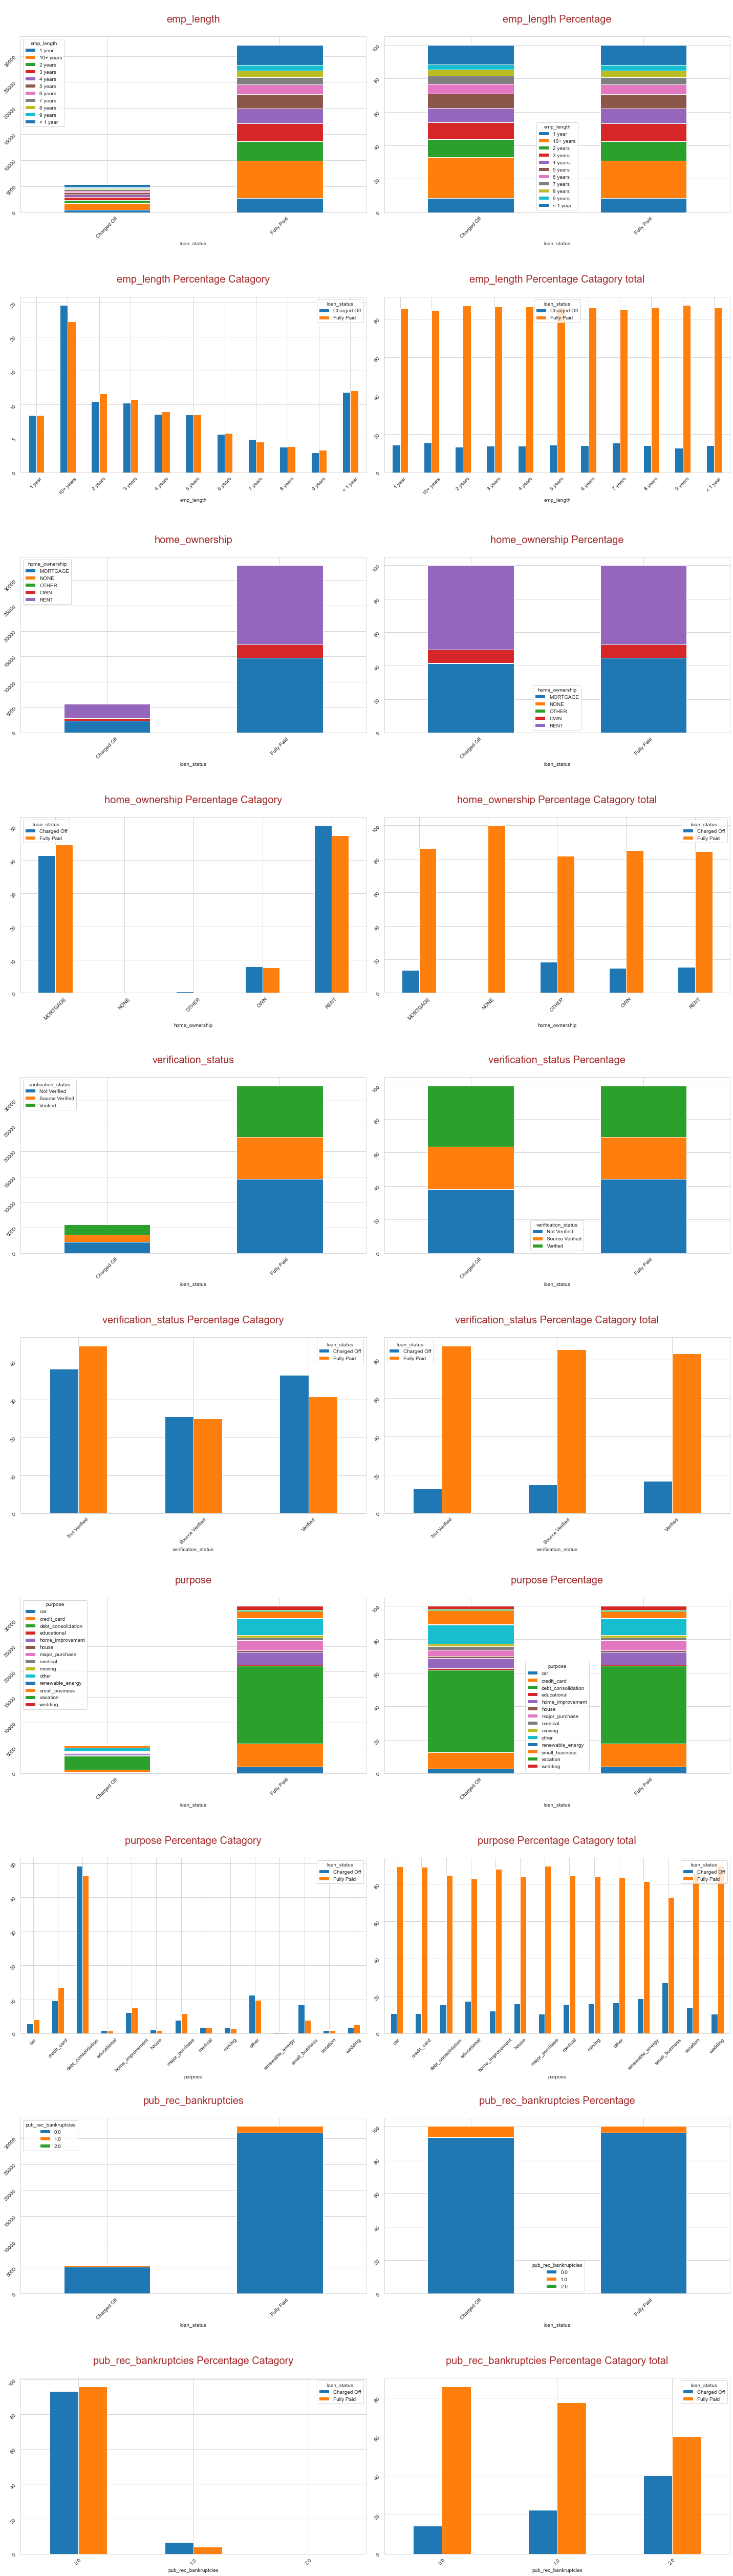

In [88]:
fig, ax = plt.subplots(ncols = 2, nrows = 10, figsize = [20, 70])
frow = 0
for var in ['emp_length', 'home_ownership', 'verification_status', 'purpose','pub_rec_bankruptcies']:
    df_pivot = pd.pivot_table(data = df_loan, values= "addr_state", index= "loan_status", columns = var, aggfunc = 'count')
    
    df_pivot.plot(kind= "bar", stacked = True, ax = ax[frow, 0])
    ax[frow, 0].set_title('\n' + var +'\n', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})
    ax[frow, 0].tick_params(labelrotation=45)
    
    df_pivot.apply(lambda x: 100 * x/x.sum(), axis = 1).plot(kind= "bar", stacked = True, ax = ax[frow, 1])
    ax[frow, 1].set_title('\n' + var + " Percentage\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})
    ax[frow, 1].tick_params(labelrotation=45)
    frow += 1
    
    df_pivot.apply(lambda x: 100 * x/x.sum(), axis = 1).T.plot(kind= "bar", stacked = False, ax = ax[frow, 0])
    ax[frow, 0].set_title('\n' + var + " Percentage Catagory\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})
    ax[frow, 0].tick_params(labelrotation=45)
    
    df_pivot.apply(lambda x: 100 * x/x.sum(), axis = 0).T.plot(kind= "bar", stacked = False, ax = ax[frow, 1])
    ax[frow, 1].set_title('\n' + var + " Percentage Catagory total\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})
    ax[frow, 1].tick_params(labelrotation=45)
    
    frow += 1
    
fig.tight_layout()
plt.show()

In [89]:
df_loan.pub_rec_bankruptcies.value_counts()

0.00    36238
1.00     1637
2.00        5
Name: pub_rec_bankruptcies, dtype: int64

**Observations**

1. emp_length
    * There is no signiificant diference in fully paid and carged off for diferent employment length
2. home_ownership        
    * There is no signiificant trend diferece between fully paid and defaulters in relation to home ownership
3. verification_status   
    * There is a counter intuitive trend visible here, the verified customers have a higher chance of default as compare to unverified borrower
4. purpose      
    * Dept consolidation is the main reason for the loans
    * Small business have a higher chance of getting charged off
5. pub_rec_bankruptcies 
    * The number of loans provided to borrower with public bankrupcy record is very less, still it followes the expected treand of high defaults with high number of bankrupcies

In [90]:
df_loan.earliest_cr_line.value_counts()

1999-10-01    360
1998-11-01    357
2000-10-01    341
1998-12-01    340
1997-12-01    318
             ... 
2065-11-01      1
1973-02-01      1
2008-10-01      1
2061-12-01      1
1974-10-01      1
Name: earliest_cr_line, Length: 524, dtype: int64

Since the date can't be in future we will convert the year after 2008 to 19th century

In [91]:
df_loan["earliest_cr_line_year"] = df_loan.earliest_cr_line.dt.year

In [92]:
df_loan["earliest_cr_line_year"].dtypes

dtype('int64')

In [93]:
df_loan.earliest_cr_line_year = df_loan.earliest_cr_line_year.apply(lambda x:x-100 if x >2008 else x)

In [94]:
df_loan.earliest_cr_line_year.value_counts()

2000    3160
1999    2896
1998    2773
2001    2462
1997    2387
1996    2202
1995    2078
1994    1948
2002    1890
2003    1813
2004    1727
2005    1467
1993    1460
2006    1154
1992    1029
1990    1005
1991     945
1989     834
1988     709
2007     698
1987     590
1986     478
1985     439
1984     395
1983     322
1982     215
1981     181
1980     175
1978     161
1979     157
2008     153
1977     112
1976      93
1975      83
1974      62
1973      61
1972      49
1970      47
1971      45
1969      37
1968      19
1967      18
1966      11
1963      10
1965       8
1964       6
1962       5
1954       2
1961       2
1959       1
1956       1
1946       1
1950       1
Name: earliest_cr_line_year, dtype: int64

In [95]:
df_loan["earliest_cr_line_month"] = df_loan.earliest_cr_line.dt.month

<AxesSubplot:xlabel='earliest_cr_line_year', ylabel='Density'>

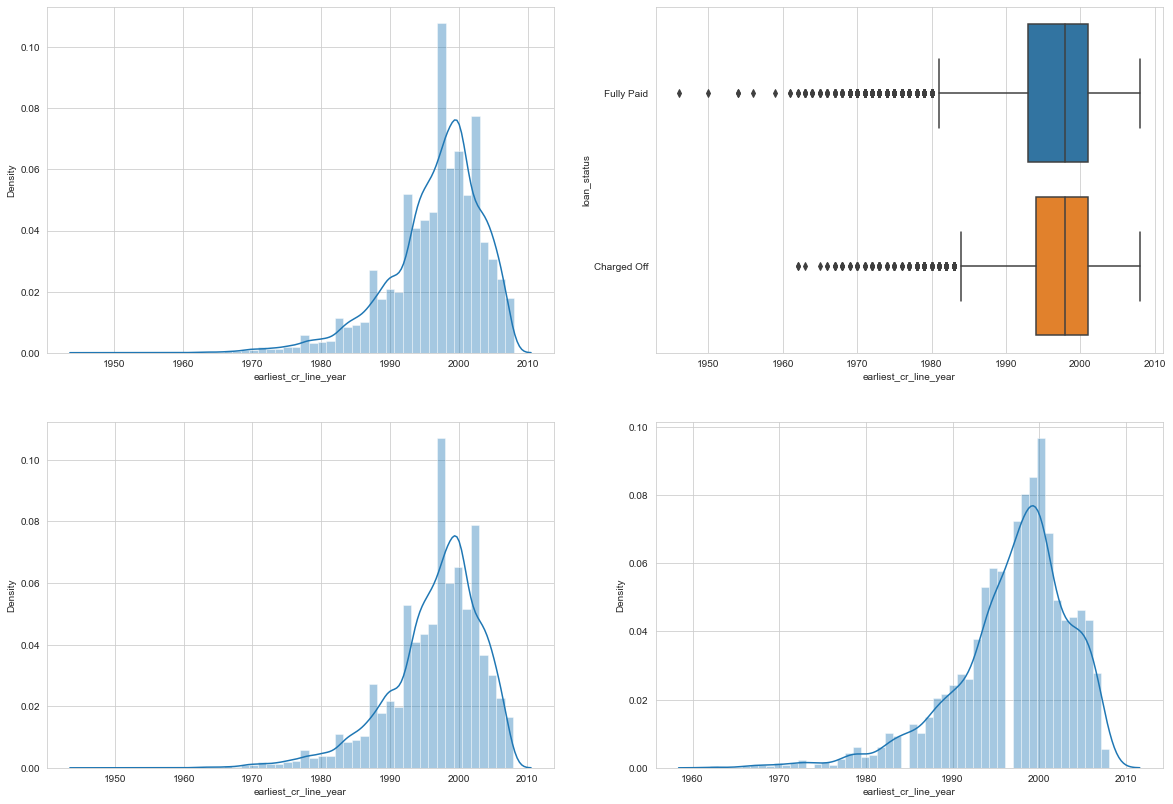

In [96]:
fig, ax = plt.subplots(2, 2,  figsize = [20,14])
sns.distplot(df_loan.earliest_cr_line_year, ax = ax[0, 0])
sns.boxplot(df_loan.earliest_cr_line_year,df_loan.loan_status, ax = ax[0, 1])
sns.distplot(df_loan[df_loan.loan_status == "Fully Paid"].earliest_cr_line_year, ax = ax[1, 0])
sns.distplot(df_loan[df_loan.loan_status == "Charged Off"].earliest_cr_line_year, ax = ax[1, 1])

**Observation**

The distribution is similar for defaulters and fully paid borrowers, this has no impact on the target variable

In [97]:
df_loan.inq_last_6mths.value_counts()

0    18709
1    10660
2     5654
3     2983
4      316
5      144
6       63
7       34
8       14
Name: inq_last_6mths, dtype: int64

<AxesSubplot:xlabel='inq_last_6mths', ylabel='Density'>

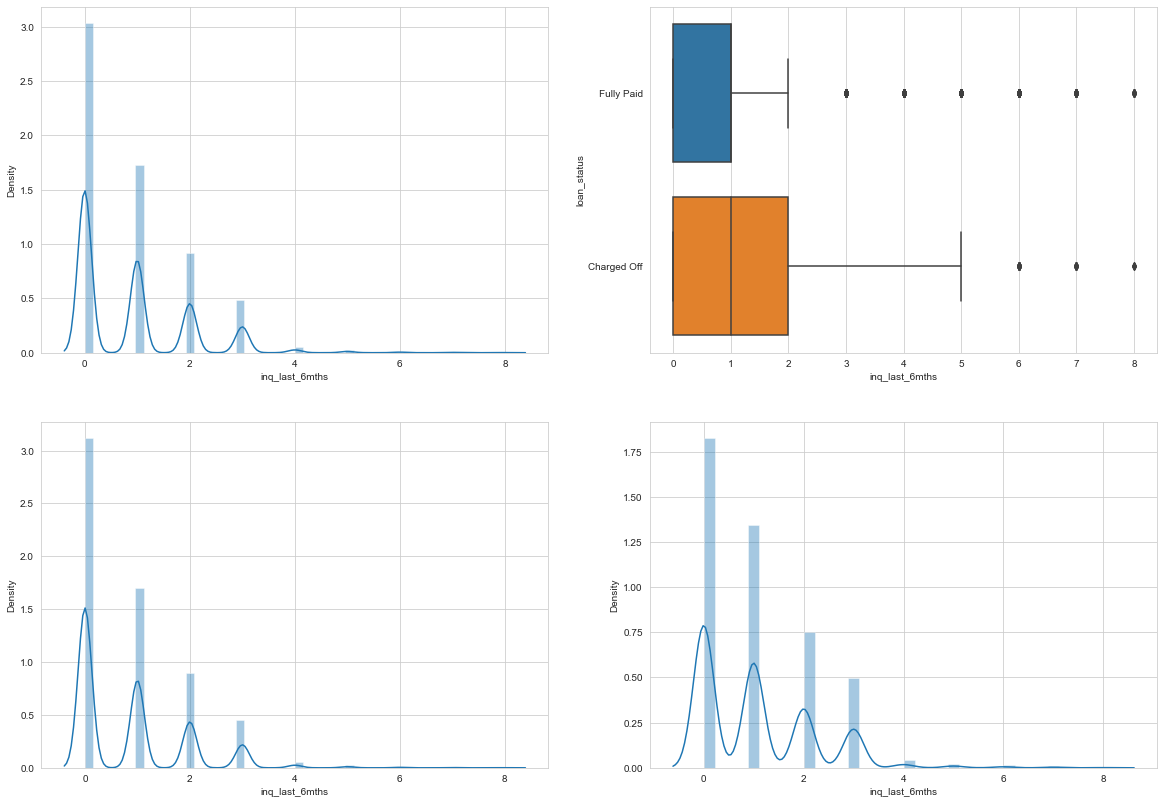

In [98]:
fig, ax = plt.subplots(2, 2, figsize=[20, 14])
sns.distplot(df_loan.inq_last_6mths, ax = ax[0,0])
sns.boxplot(df_loan.inq_last_6mths,df_loan.loan_status, ax = ax[0,1])
sns.distplot(df_loan[df_loan.loan_status == "Fully Paid"].inq_last_6mths, ax = ax[1,0])
sns.distplot(df_loan[df_loan.loan_status == "Charged Off"].inq_last_6mths, ax = ax[1,1])

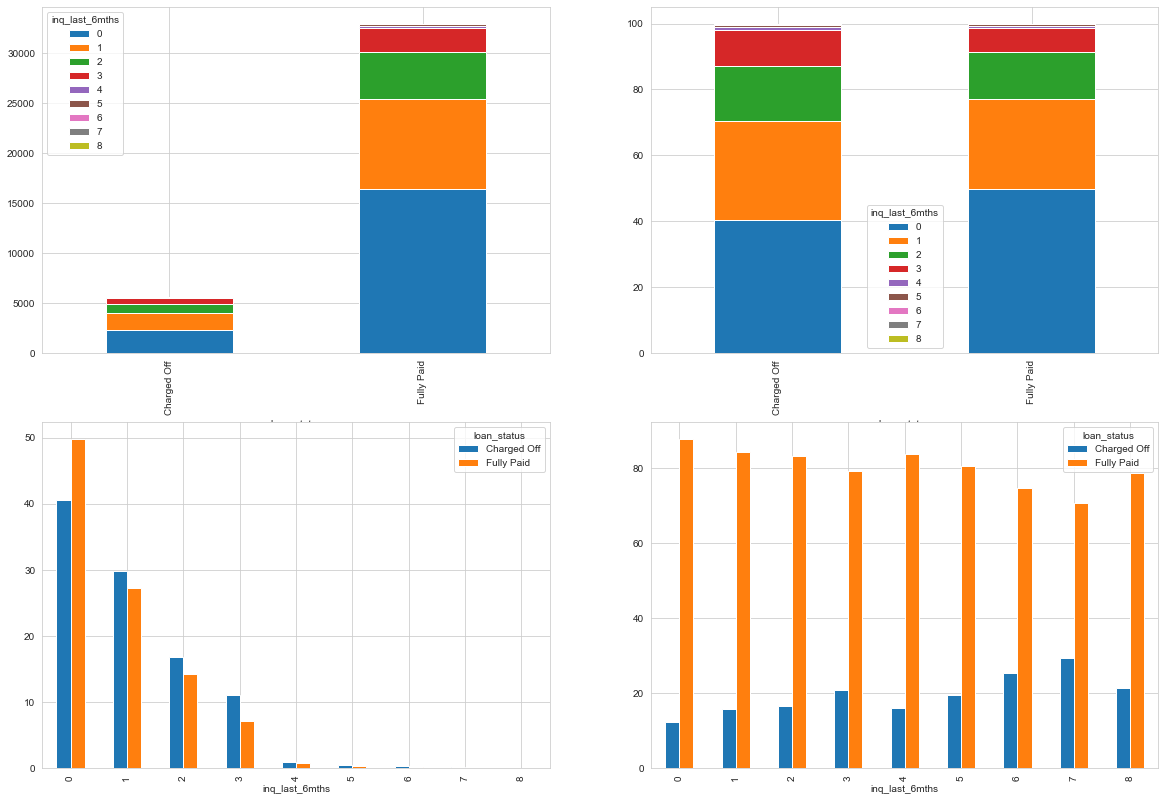

In [99]:
df_pivot = pd.pivot_table(data = df_loan, values= "addr_state", index= "loan_status", columns = "inq_last_6mths", aggfunc = 'count')
fix, ax = plt.subplots(ncols = 2, nrows = 2, figsize = [20,14])
df_pivot.plot.bar(stacked = True, ax = ax[0, 0])
df_pivot.apply(lambda x: 100 * x/x.sum(), axis = 1).plot.bar(stacked = True, ax = ax[0, 1])
df_pivot.apply(lambda x: 100 * x/x.sum(), axis = 1).T.plot.bar(ax = ax[1, 0])
df_pivot.apply(lambda x: 100 * x/x.sum(), axis = 0).T.plot.bar(ax = ax[1, 1])
plt.show()

**Observation**

The number of inquary has effect on the charge off, loans having more number of inquary have a higher chance of default

In [100]:
df_loan.pub_rec.value_counts()

0    36507
1     2013
2       48
3        7
4        2
Name: pub_rec, dtype: int64

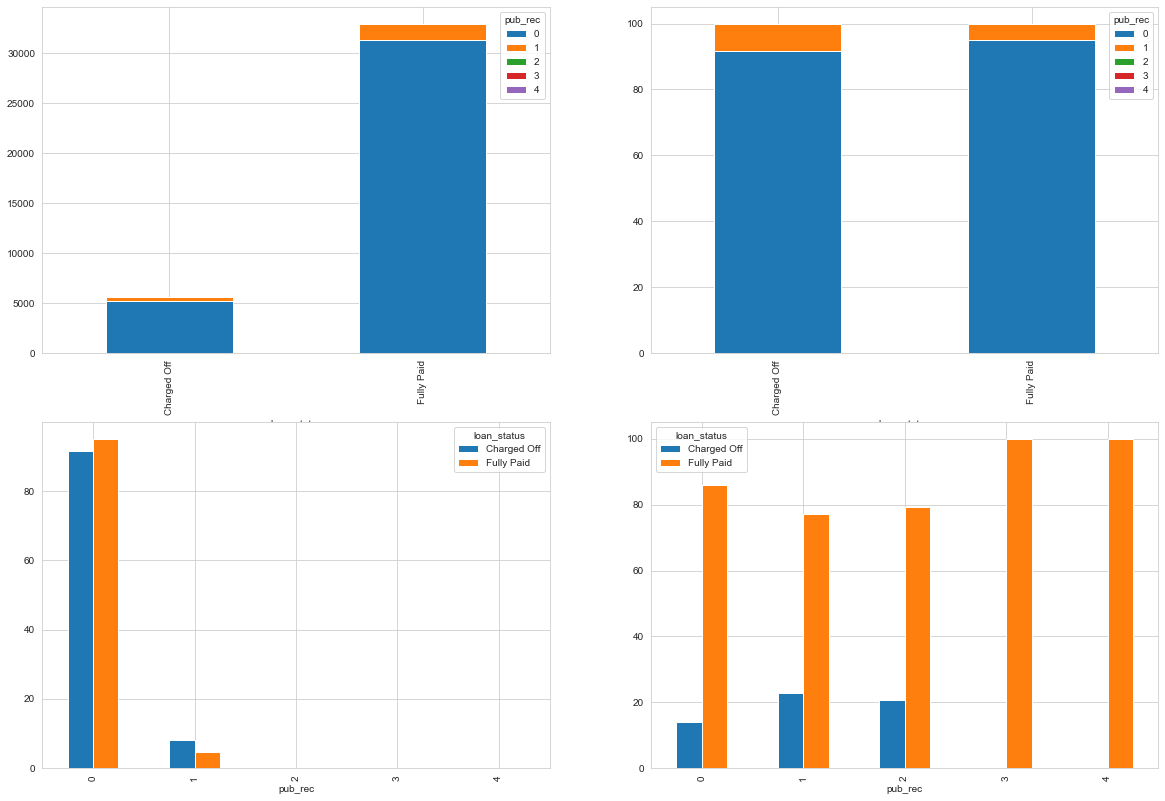

In [101]:
df_pivot = pd.pivot_table(data = df_loan, values= "addr_state", index= "loan_status", columns = "pub_rec", aggfunc = 'count')
fix, ax = plt.subplots(ncols = 2, nrows = 2, figsize = [20,14])
df_pivot.plot.bar(stacked = True, ax = ax[0, 0])
df_pivot.apply(lambda x: 100 * x/x.sum(), axis = 1).plot.bar(stacked = True, ax = ax[0, 1])
df_pivot.apply(lambda x: 100 * x/x.sum(), axis = 1).T.plot.bar(ax = ax[1, 0])
df_pivot.apply(lambda x: 100 * x/x.sum(), axis = 0).T.plot.bar(ax = ax[1, 1])
plt.show()

**Observation**

As suspected the Number of derogatory public records increases the chance of defaults. 
In current data set for pub_rec 3 and 4 number of records are very less so they can be ignored 

In [102]:
df_loan.open_acc.value_counts()

7     3909
6     3846
8     3814
9     3607
5     3111
10    3097
11    2666
4     2300
12    2198
13    1855
3     1470
14    1427
15    1146
16     908
17     716
2      596
18     516
19     384
20     281
21     235
22     137
23      93
24      75
25      53
26      34
28      24
27      22
30      15
29      13
31       7
34       5
35       4
32       3
33       3
36       2
39       1
38       1
44       1
41       1
42       1
Name: open_acc, dtype: int64

<AxesSubplot:xlabel='open_acc', ylabel='Density'>

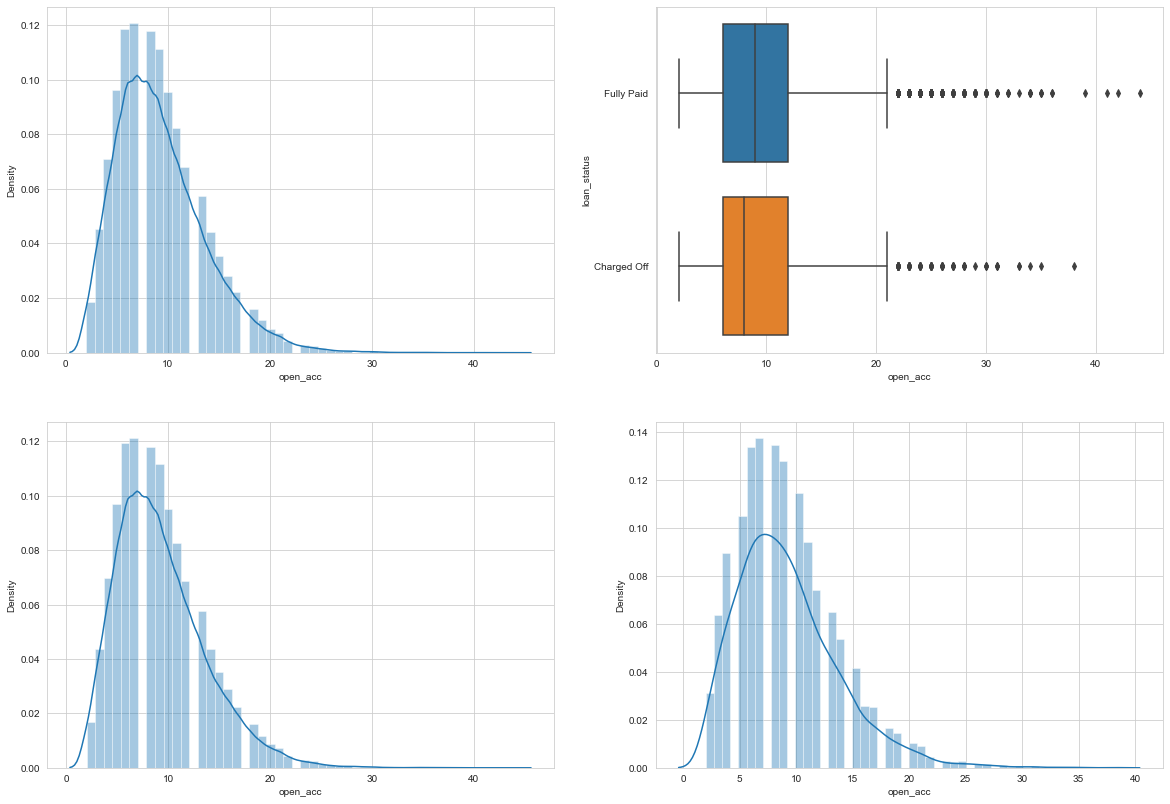

In [103]:
fig, ax = plt.subplots(2, 2, figsize=[20, 14])
sns.distplot(df_loan.open_acc, ax = ax[0,0])
sns.boxplot(df_loan.open_acc,df_loan.loan_status, ax = ax[0,1])
sns.distplot(df_loan[df_loan.loan_status == "Fully Paid"].open_acc, ax = ax[1,0])
sns.distplot(df_loan[df_loan.loan_status == "Charged Off"].open_acc, ax = ax[1,1])

In [104]:
df_loan.total_acc.value_counts()

16    1424
15    1418
17    1411
14    1403
20    1390
      ... 
74       1
77       1
78       1
87       1
90       1
Name: total_acc, Length: 82, dtype: int64

<AxesSubplot:xlabel='total_acc', ylabel='Density'>

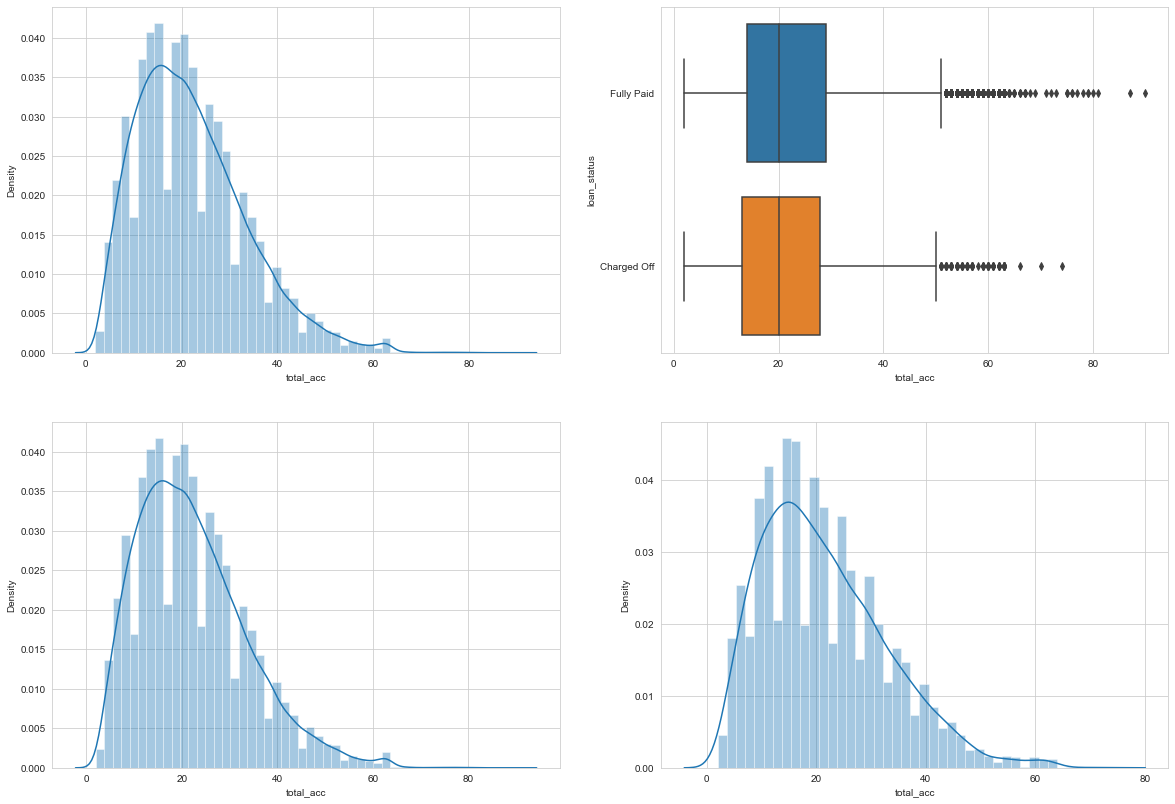

In [105]:
fig, ax = plt.subplots(2, 2, figsize=[20, 14])
sns.distplot(df_loan.total_acc, ax = ax[0,0])
sns.boxplot(df_loan.total_acc,df_loan.loan_status, ax = ax[0,1])
sns.distplot(df_loan[df_loan.loan_status == "Fully Paid"].total_acc, ax = ax[1,0])
sns.distplot(df_loan[df_loan.loan_status == "Charged Off"].total_acc, ax = ax[1,1])

In [106]:
df_loan["closed_acc"] = df_loan.total_acc - df_loan.open_acc
df_loan["closed_acc"].value_counts()

 5     1905
 6     1902
 7     1897
 4     1834
 8     1826
       ... 
 66       1
 57       1
 58       1
 71       1
-6        1
Name: closed_acc, Length: 64, dtype: int64

<AxesSubplot:xlabel='closed_acc', ylabel='Density'>

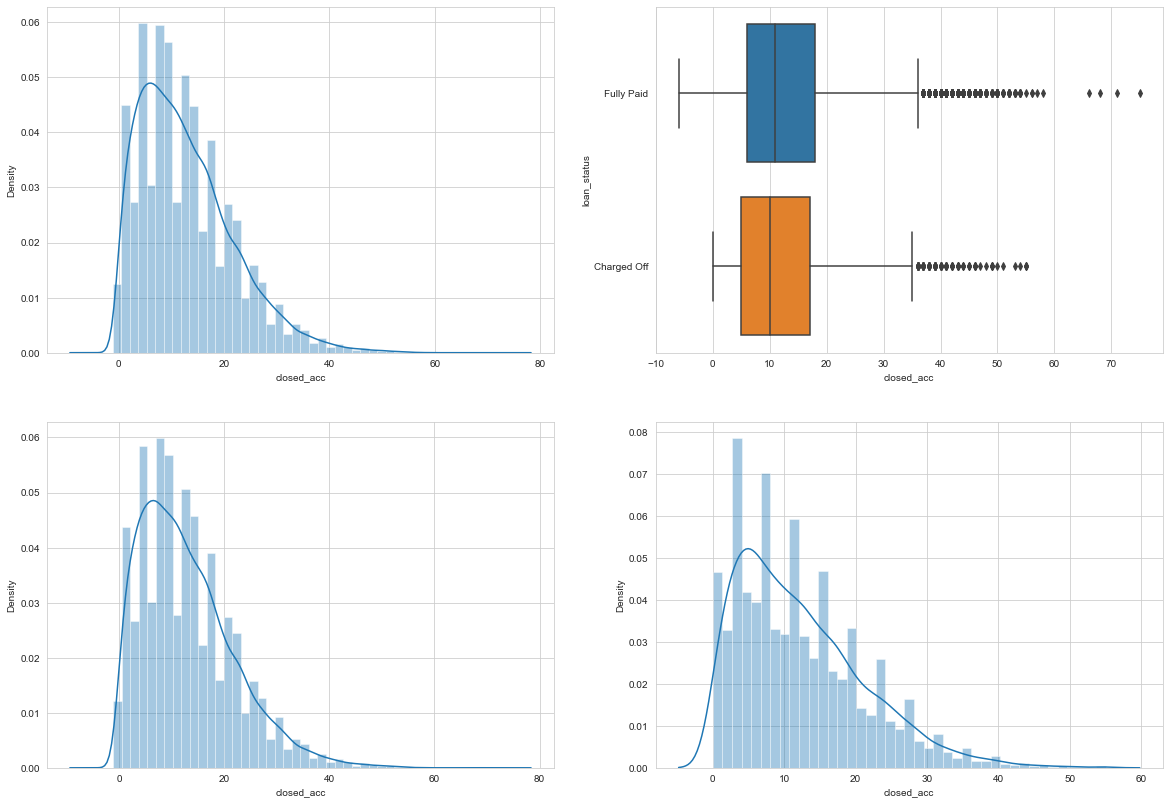

In [107]:
fig, ax = plt.subplots(2, 2, figsize=[20, 14])
sns.distplot(df_loan.closed_acc, ax = ax[0,0])
sns.boxplot(df_loan.closed_acc,df_loan.loan_status, ax = ax[0,1])
sns.distplot(df_loan[df_loan.loan_status == "Fully Paid"].closed_acc, ax = ax[1,0])
sns.distplot(df_loan[df_loan.loan_status == "Charged Off"].closed_acc, ax = ax[1,1])

**Observation**

The number of accounts (open, closed and total) have similar distributions for charge off an fully paid loans. these are not driving variables for defaults

<AxesSubplot:xlabel='revol_bal', ylabel='Density'>

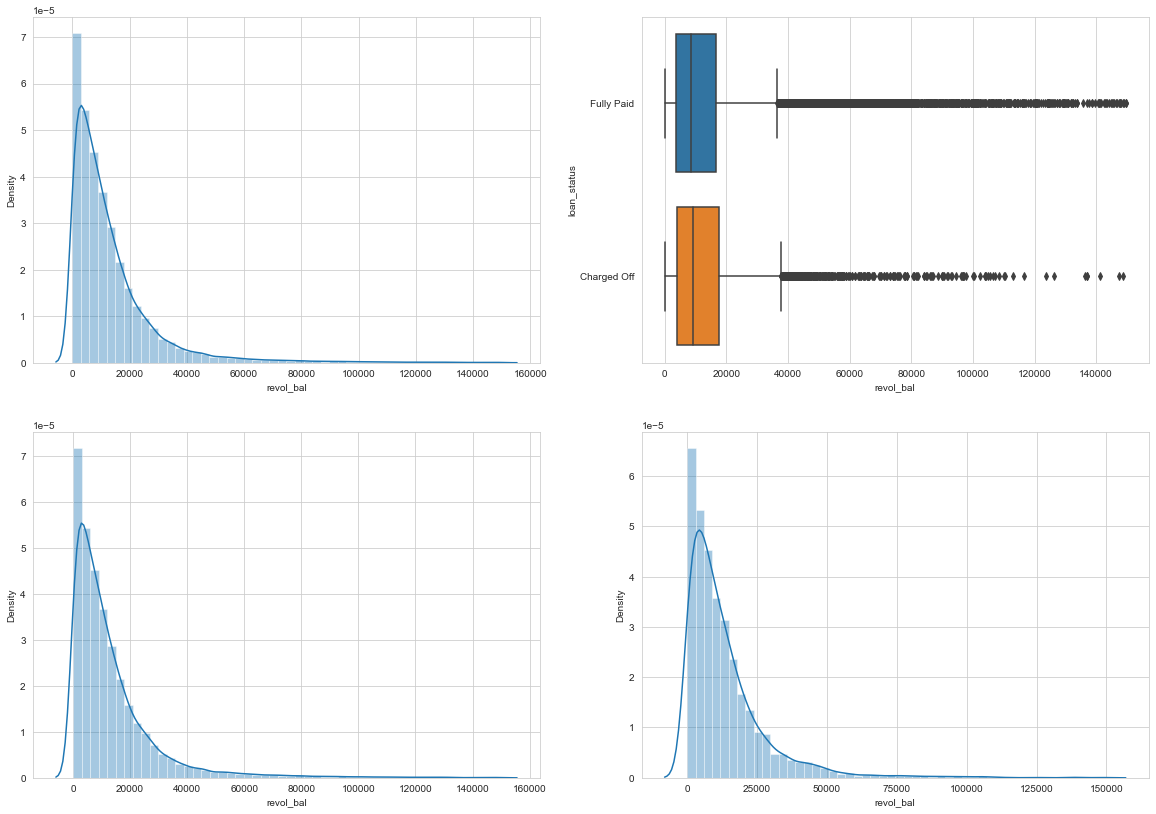

In [108]:
fig, ax = plt.subplots(2, 2, figsize=[20, 14])
sns.distplot(df_loan.revol_bal, ax = ax[0,0])
sns.boxplot(df_loan.revol_bal,df_loan.loan_status, ax = ax[0,1])
sns.distplot(df_loan[df_loan.loan_status == "Fully Paid"].revol_bal, ax = ax[1,0])
sns.distplot(df_loan[df_loan.loan_status == "Charged Off"].revol_bal, ax = ax[1,1])

<AxesSubplot:xlabel='revol_util', ylabel='Density'>

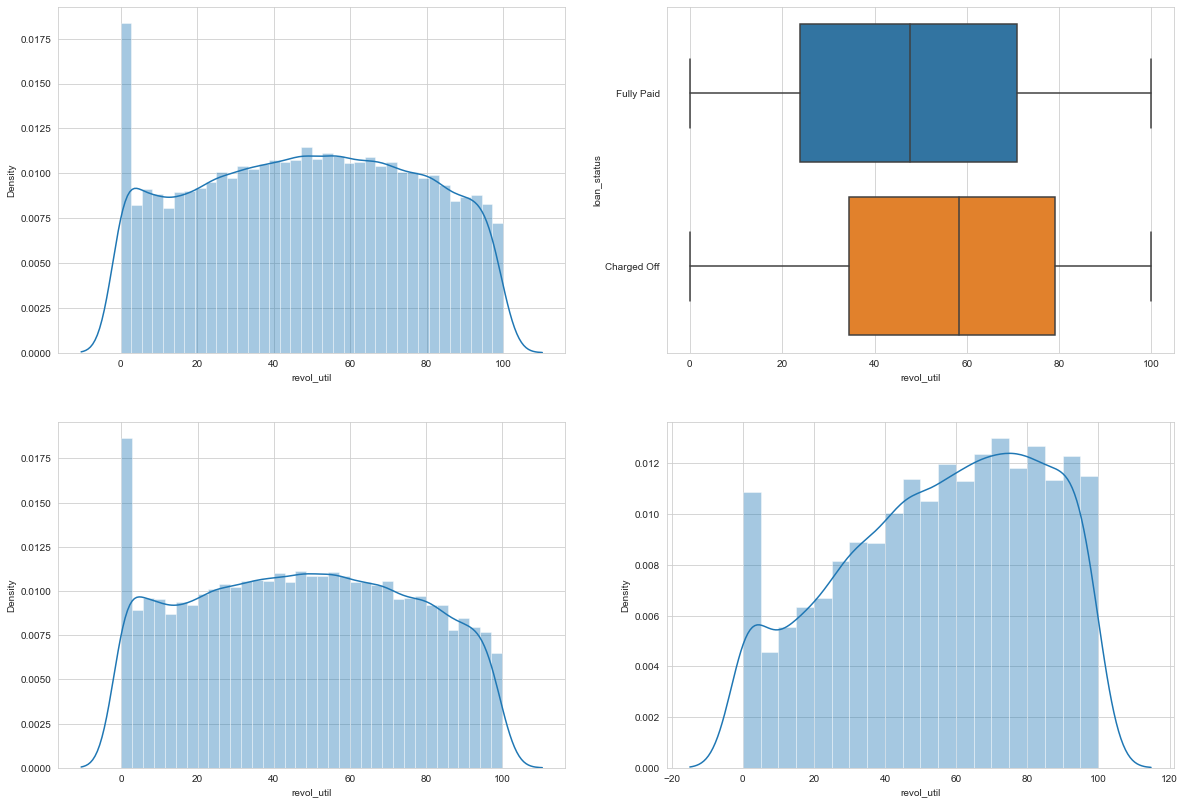

In [109]:
fig, ax = plt.subplots(2, 2, figsize=[20, 14])
sns.distplot(df_loan.revol_util, ax = ax[0,0])
sns.boxplot(df_loan.revol_util,df_loan.loan_status, ax = ax[0,1])
sns.distplot(df_loan[df_loan.loan_status == "Fully Paid"].revol_util, ax = ax[1,0])
sns.distplot(df_loan[df_loan.loan_status == "Charged Off"].revol_util, ax = ax[1,1])

**Observation**

Revolving credit balance is not the driver for defaults but higher utilizatio of revolving balance indicated higher chances of defaults.

# Bivariate Analysis

* The variable of interest :
    * Interest vs amounts
	* income vs loan amounts
	* Verification_status vs amounts
    * grade vs amount vs term
	* sub_grade vs amount

---
#### Interest vs amounts

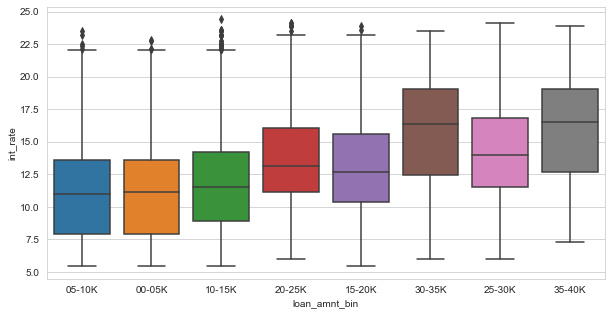

In [110]:
plt.figure(figsize=(10,5))
sns.boxplot(y='int_rate', x='loan_amnt_bin', data=df_loan)
plt.show()

####  loan_amnt vs annual_inc

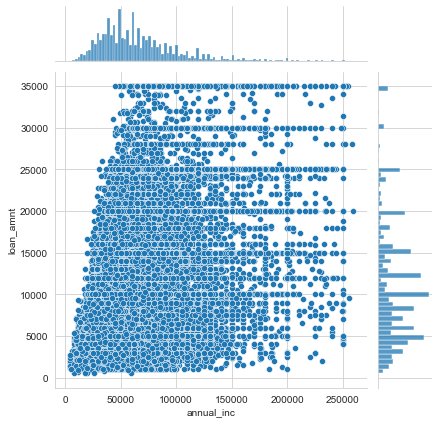

In [111]:
sns.jointplot('annual_inc', 'loan_amnt', df_loan.loc[df_loan['annual_inc']<260000])
plt.show()

**Observation:**
-  There are people with average income lower than 50000 taking loans of 25000 or higher. These would be risky loans. 

---
#### loan_amnt vs grade

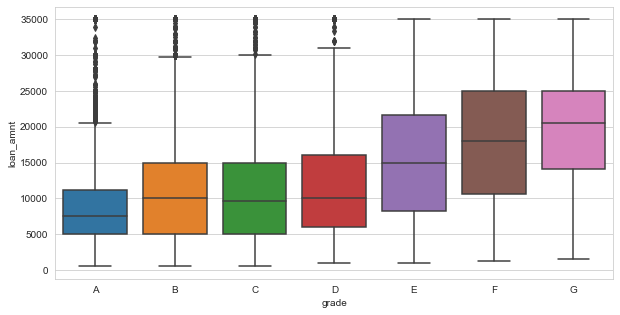

In [112]:
plt.figure(figsize=(10,5))
sns.boxplot(y='loan_amnt', x='grade', data=df_loan, order=["A", "B", "C", "D", "E", "F", "G"])
plt.show()

 -  Larger loans generally appear to be given a lower grade, with the median loan amount for a grade G loan being almost 10000 higher than that of a grade A, B, or C loan.

---
#### loan_amnt vs verification_status vs loan status

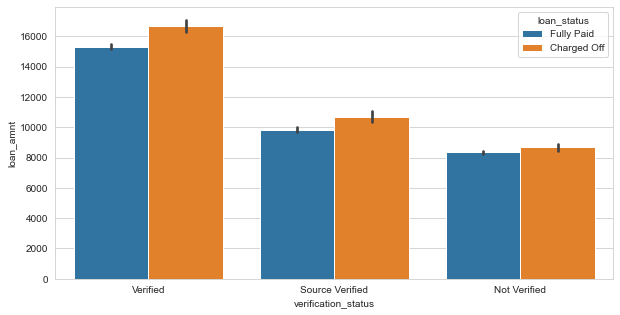

In [113]:
plt.figure(figsize=(10,5))
sns.barplot(x='verification_status', y='loan_amnt', hue="loan_status", data=df_loan, estimator=np.mean)
plt.show()

**Observation:**
- Higher loan amounts are Verified more often.  
- We already know that larger loans are less in number, but see a higher charge off rate.
- <mark>This, combined with previous observation, explains why verfied loans see a higher rate of default.</mark> It's not the verified status per se, it's the fact that higher loan amounts are riskier and are also verified more often by Lending Club. 

#### Defaulted vs Purpose of loan

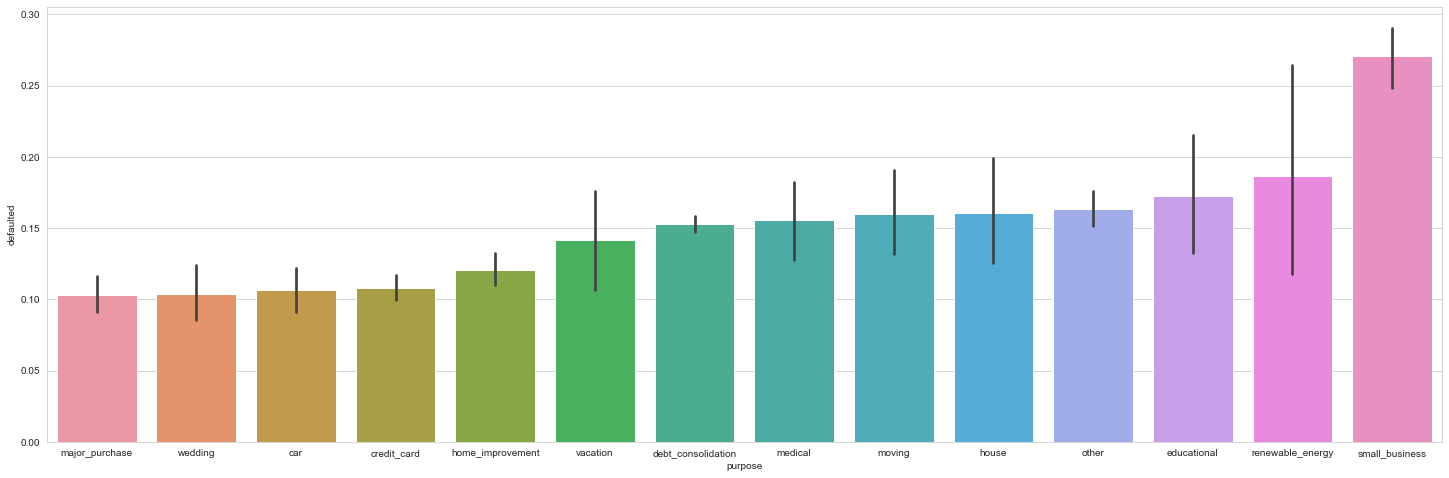

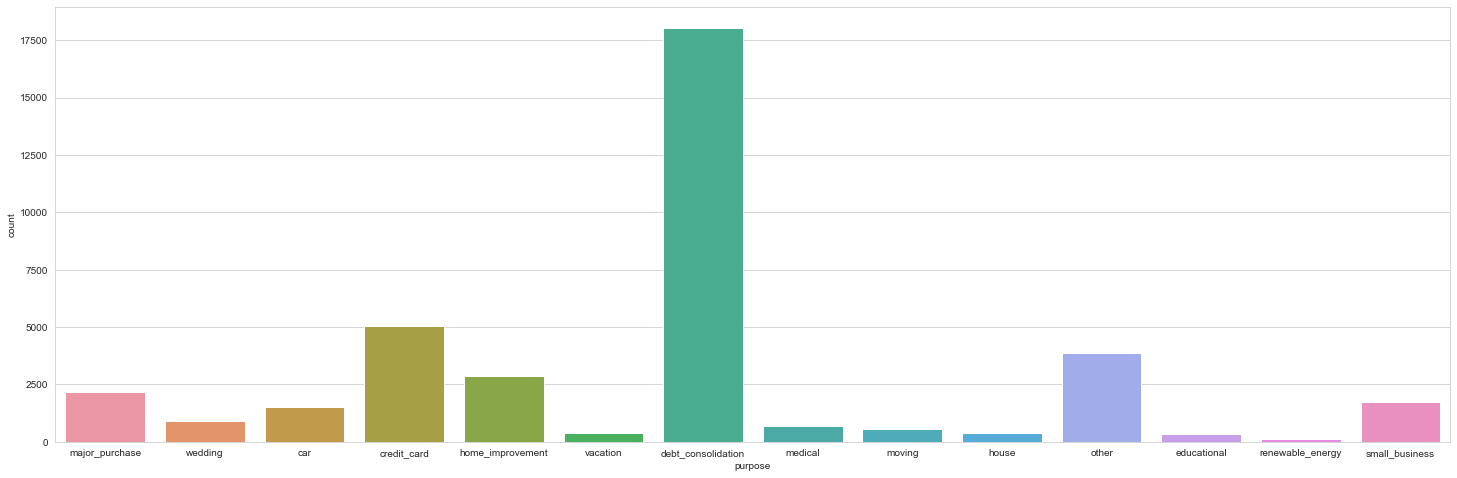

In [114]:
df_loan['defaulted'] = df_loan['loan_status'].apply(lambda x: 1 if x == 'Charged Off' else 0)
plt.figure(figsize=(25, 8))
order_business = df_loan.groupby('purpose').defaulted.aggregate(np.mean).reset_index().sort_values('defaulted')
sns.barplot(data=df_loan, y='defaulted', x='purpose', order=order_business['purpose'])
plt.show()

plt.figure(figsize=(25, 8))
sns.countplot(data=df_loan, x='purpose', order=order_business['purpose'])
plt.show()

**Observation:**

* If you see the trend of the defaulters there are more people from educational, renewable energy & small business people present
* And with the reason as Other there is a huge no.of people and there is a high chanse of rejecting the loan if it's from the other purpose

---
#### Interest Rate vs Term

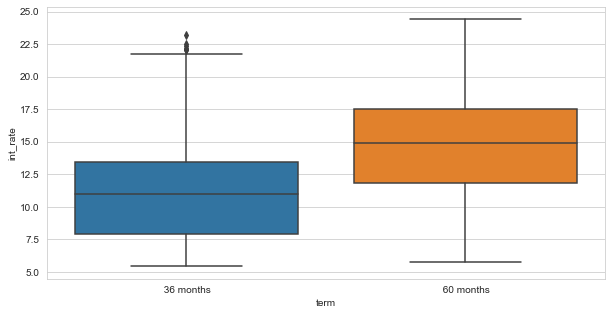

In [115]:
plt.figure(figsize=(10,5))
sns.boxplot(y='int_rate', x='term', data=df_loan)
plt.show()

**Observation:**
-  Intrest rates are besed on term. Larger amounts were seen to be given for higher term. Ther rate of intrest associated with them is also high.

---
#### Interest Rate and Sub Grade

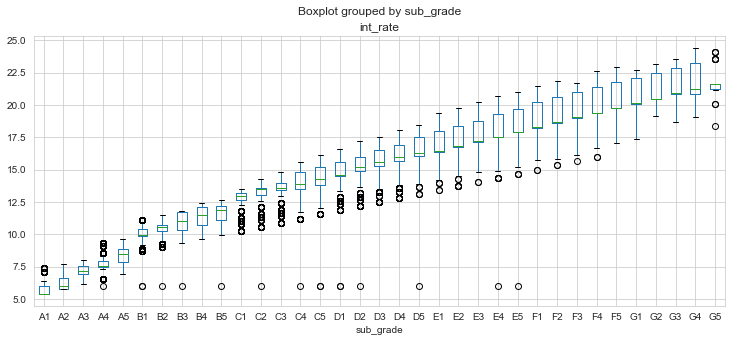

In [116]:
df_loan.boxplot(column='int_rate', by='sub_grade',figsize=(12,5))
plt.show()

**Observation:**
-  Intrest rates varies directly with the subgrade. Larger or worst the sub grade, higher are the rate of intrest for the loan.

---
#### Interest Rate and loan status

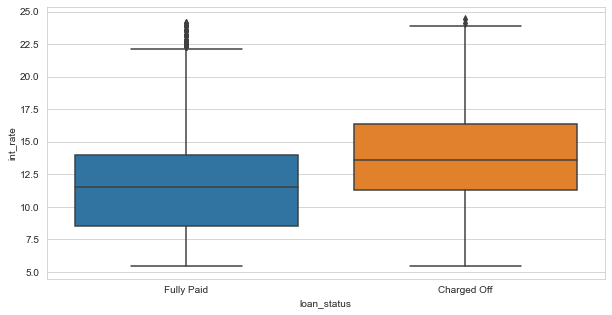

In [117]:
plt.figure(figsize=(10,5))
sns.boxplot(y='int_rate', x='loan_status', data=df_loan)
plt.show()

**Observation:**
- Loans at a higher intrest rate are more likely to be Charged Off.

#### Loan amount vs Grade vs Term

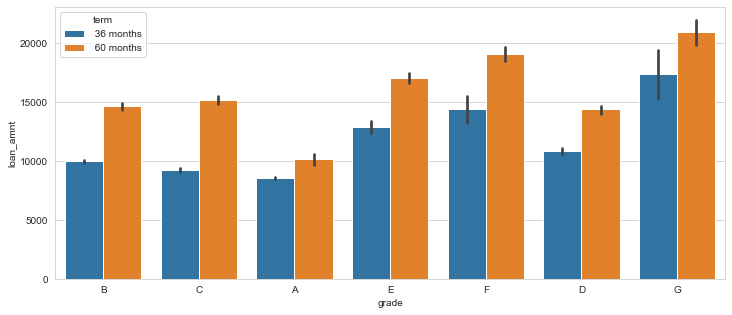

In [118]:
plt.figure(figsize=(12,5))
sns.barplot(x='grade', y='loan_amnt', hue="term", data=df_loan, estimator=np.mean)
plt.show()

**Observation:**
-  Our assumption made during univariate analysis is more evident with this plot. Higher loan amount are associated with lower grade for longer terms.

#### Loan amount Vs term Vs Loan Status


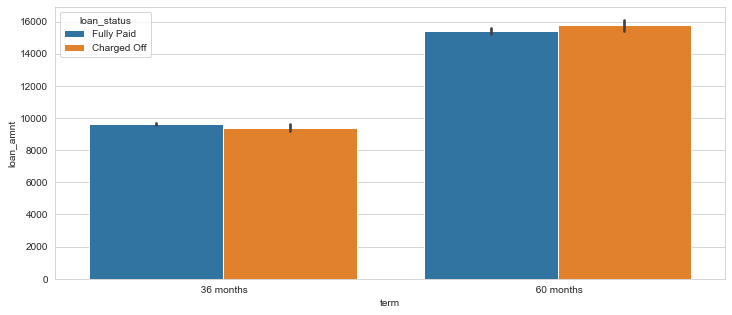

In [119]:
plt.figure(figsize=(12,5))
sns.barplot(x='term', y='loan_amnt', hue="loan_status", data=df_loan, estimator=np.mean)
plt.show()

**Observation:**
-  Our assumption made during univariate analysis is more evident with this plot. Higher loan amount are associated with longer terms and see higher Charge Offs.


#### Loan amount Vs addr_state vs loan Status


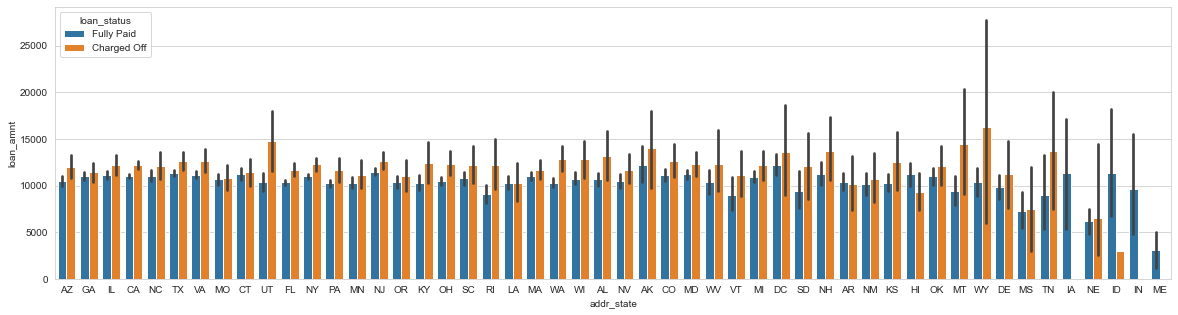

In [120]:
plt.figure(figsize=(20,5))
sns.barplot(x='addr_state', y='loan_amnt', hue='loan_status',data=df_loan, estimator=np.mean)
plt.show()

**Observation:**
*  Some states have high average loan amount that was charged off. Whats happening in those states is somthing LC can investigate into.

### Conclusion: 

**Below are the top variables that are impacting the defaulters:**

* **Grade, SubGrade**     -- As grade changes there are defaulters changing, G being the highest
* **Purpose of the loan** -- Small business has more defaulters
* **Interest rate**       -- As interest rate increases defaulters are moe 
* **Term**-- There are more defaulters with 60 months term than 36 months
* **Annual income**       -- If the annual income is more then high possibility that he pays the loan